# Telecom-Churn

#### Business Case:
No-Churn Telecom is an established Telecom operator in Europe with more than a decade in Business. Due to new players in the
market, telecom industry has become very competitive and retaining customers becoming a challenge.In spite of No-Churn 
initiatives of reducing tariffs and promoting more offers, the churn rate (percentage of customers migrating to competitors) 
is well above 10%.No-Churn wants to explore possibility of Machine Learning to help with following use cases to retain 
competitive edge in the industry.

#### PROJECT GOAL
Help No-Churn with their use cases with ML
1. Understanding the variables that are influencing the customers to migrate.
2. Creating Churn risk scores that can be indicative to drive retention campaigns.
3. Introduce new predicting variable “CHURN-FLAG” with values YES(1) or NO(0) so that email campaigns with lucrative offers
   can be targeted to Churn YES customers help to identify possible CHURN-FLAG YES customers and provide more attention in 
   customer touch point areas, including customer care support, request fulfilment, auto categorizing tickets as high priority 
   for quick resolutions any questions they may have etc.,
    

Description:-
    
State: Represents the state in which the customer resides (e.g., KS for Kansas, OH for Ohio).

Account Length: Indicates the number of days the customer has been a subscriber.

Area Code: Represents the area code associated with the customer's phone number.

Phone: Represents the customer's phone number.

International Plan: Indicates whether the customer has an international calling plan (yes or no).

VMail Plan: Indicates whether the customer has a voicemail plan (yes or no).

VMail Message: Represents the number of voicemail messages the customer has.

Day Mins: Represents the total number of minutes the customer has used during the day.

Day Calls: Indicates the total number of calls the customer has made during the day.

Day Charge: Represents the total charge for daytime calls.

Eve Mins: Represents the total number of minutes the customer has used during the evening.

Eve Calls: Indicates the total number of calls the customer has made during the evening.

Eve Charge: Represents the total charge for evening calls.

Night Mins: Represents the total number of minutes the customer has used during the night.

Night Calls: Indicates the total number of calls the customer has made during the night.

Night Charge: Represents the total charge for nighttime calls.

International Mins: Represents the total number of international minutes the customer has used.

International Calls: Indicates the total number of international calls the customer has made.

International Charge: Represents the total charge for international calls.

CustServ Calls: Indicates the number of customer service calls made by the customer.

Churn: Indicates whether the customer has churned (canceled their subscription) or not (False).

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [2]:
df = pd.read_csv('telco_churn.csv')
df.head(5)

,Unnamed: 0,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,0,KS,128,415,382-4657,no,yes,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,1,OH,107,415,371-7191,no,yes,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,2,NJ,137,415,358-1921,no,no,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,3,OH,84,408,375-9999,yes,no,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,4,OK,75,415,330-6626,yes,no,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### Listing of column headers

In [3]:
# List of column headers
headerList = ['SL.No', 'State', 'Account_Length', 'Area_Code','Phone','International_Plan','VMail_Plan','VMail_Message',
              'Day_Mins','Day_Calls','Day_Charge','Eve_Mins','Eve_Calls','Eve_Charge','Night_Mins','Night_Calls','Night_Charge',
             'International_Mins','International_calls','International_Charge','CustServ_Calls','Churn']
# converting data frame to csv
df.to_csv("telco_churn_new.csv", header=headerList, index=False)

# display modified csv file
df1 = pd.read_csv("telco_churn_new.csv")
df1.head(5)

,SL.No,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,0,KS,128,415,382-4657,no,yes,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,1,OH,107,415,371-7191,no,yes,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,2,NJ,137,415,358-1921,no,no,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,3,OH,84,408,375-9999,yes,no,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,4,OK,75,415,330-6626,yes,no,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### EDA - Exploratory Data Analysis

In [4]:
df1.drop(['SL.No'],axis=1,inplace=True)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account_Length        4617 non-null   int64  
 2   Area_Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International_Plan    4617 non-null   object 
 5   VMail_Plan            4617 non-null   object 
 6   VMail_Message         4617 non-null   int64  
 7   Day_Mins              4617 non-null   float64
 8   Day_Calls             4617 non-null   int64  
 9   Day_Charge            4617 non-null   float64
 10  Eve_Mins              4617 non-null   float64
 11  Eve_Calls             4617 non-null   int64  
 12  Eve_Charge            4617 non-null   float64
 13  Night_Mins            4617 non-null   float64
 14  Night_Calls           4617 non-null   int64  
 15  Night_Charge         

In [6]:
df1.describe()

,Account_Length,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df2 = df1.copy()

In [8]:
df2.head(5)

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [9]:
df1.shape

(4617, 21)

In [10]:
#checking the missing values
df1.isnull().sum()

State                   0
Account_Length          0
Area_Code               0
Phone                   0
International_Plan      0
VMail_Plan              0
VMail_Message           0
Day_Mins                0
Day_Calls               0
Day_Charge              0
Eve_Mins                0
Eve_Calls               0
Eve_Charge              0
Night_Mins              0
Night_Calls             0
Night_Charge            0
International_Mins      0
International_calls     0
International_Charge    0
CustServ_Calls          0
Churn                   0
dtype: int64

### Checking distribution of target variable

#### Plot bar chart

<Axes: xlabel='Churn', ylabel='count'>

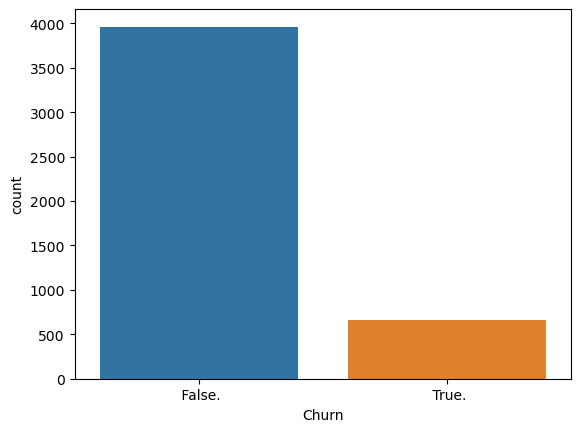

In [11]:
sns.countplot(x="Churn",data=df1)

#### Pie Chart

([<matplotlib.patches.Wedge at 0x25f0e639220>,
 [Text(-0.9922226950444745, 0.47486221521477157, '0'),
  Text(1.8942433693419938, -0.9065550494613615, '1')],
 [Text(-0.5412123791151678, 0.25901575375351177, '85.79%'),
  Text(1.4432330433081857, -0.6907086091134182, '14.21%')])

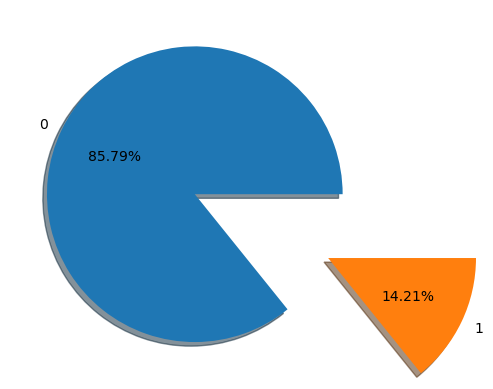

In [12]:
plt.pie(df1["Churn"].value_counts(),labels=[0,1] ,autopct='%1.2f%%' ,explode=(0,1) ,shadow=True)

#### Plot histogram

<Axes: >

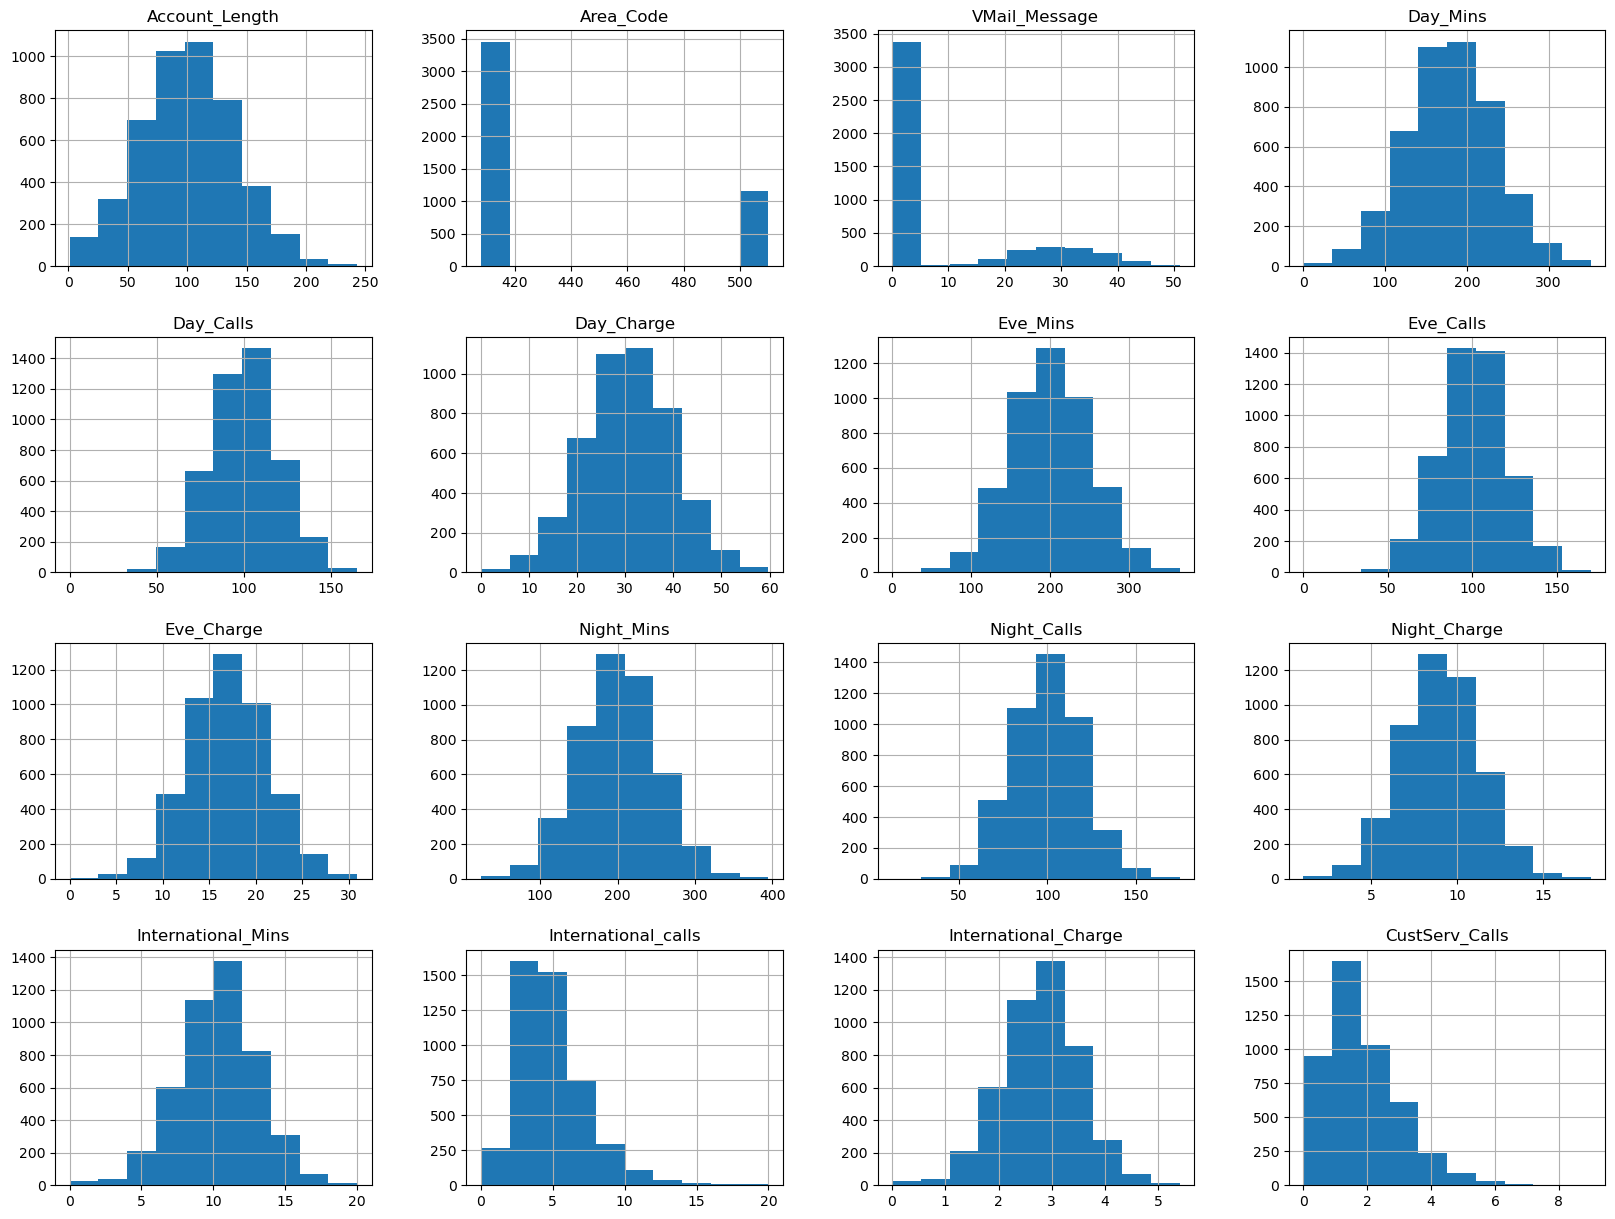

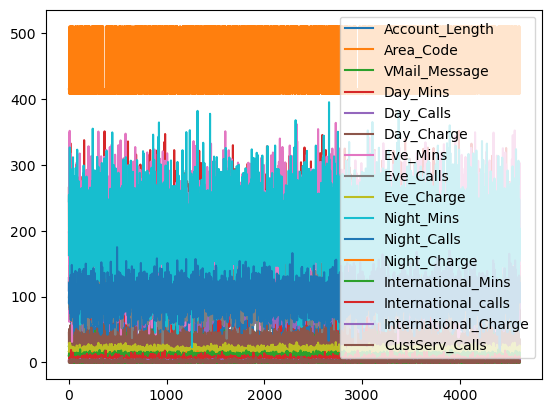

In [13]:
df1.hist(bins=10, figsize=(20,15))
df1.plot()

### Density Plot

<Axes: xlabel='International_calls', ylabel='Density'>

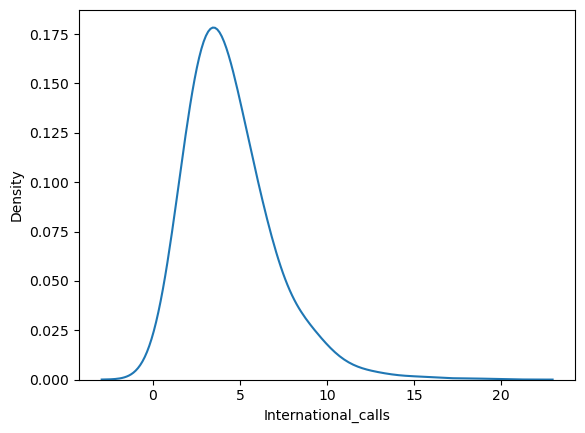

In [14]:
sns.kdeplot(df1['International_calls'], bw = 0.4)

<Axes: xlabel='CustServ_Calls', ylabel='Density'>

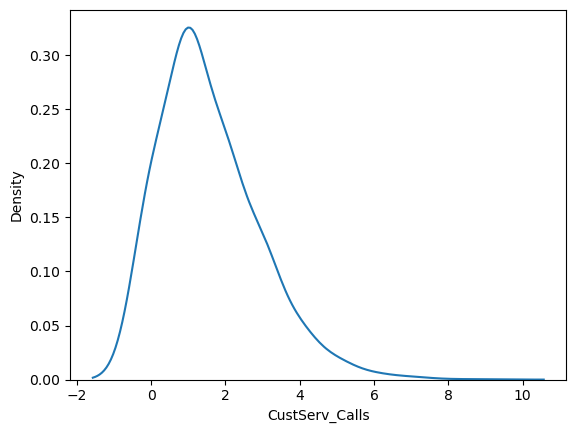

In [15]:
sns.kdeplot(df1['CustServ_Calls'], bw = 0.4)

<Axes: xlabel='VMail_Message', ylabel='Density'>

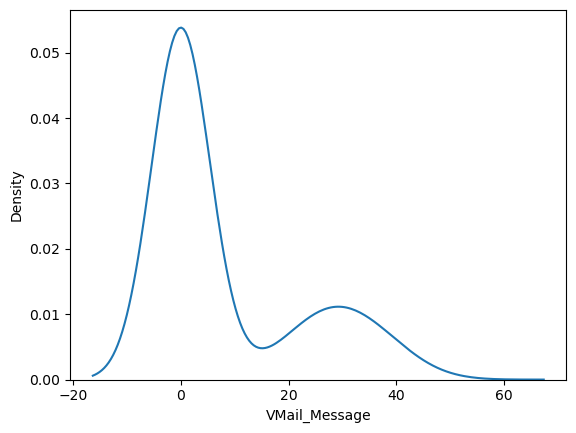

In [16]:
sns.kdeplot(df1['VMail_Message'], bw = 0.4)

Large number of people do not have Voice mail(which is Median). Dropping is not recommended

#### Box Plot

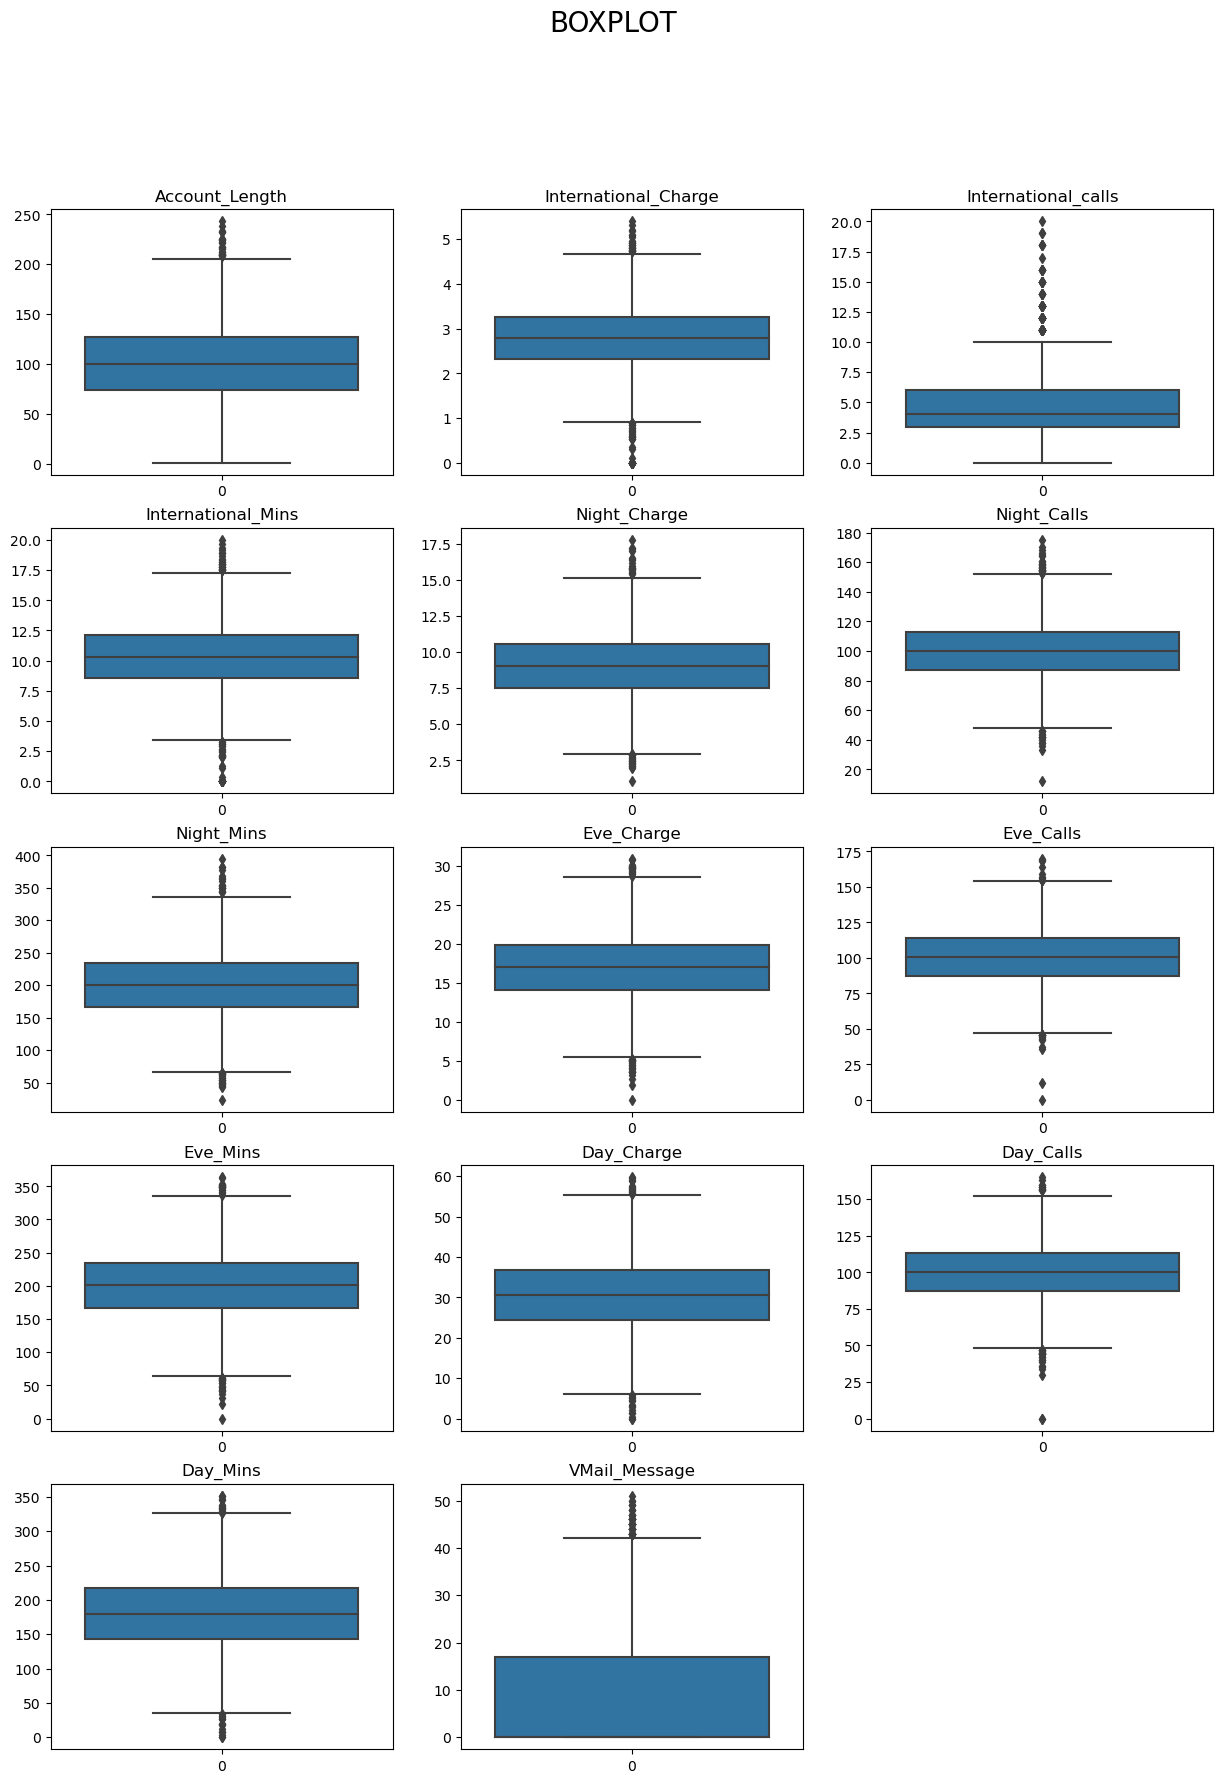

In [17]:
plt.figure(figsize = (15,20))
plt.subplot(5,3,1)
sns.boxplot(df1['Account_Length'])
plt.title('Account_Length')
plt.subplot(5,3,2)
sns.boxplot(df1['International_Charge'])
plt.title('International_Charge')
plt.subplot(5,3,3)
sns.boxplot(df1['International_calls'])
plt.title('International_calls')
plt.subplot(5,3,4)
sns.boxplot(df1['International_Mins'])
plt.title('International_Mins')
plt.subplot(5,3,5)
sns.boxplot(df1['Night_Charge'])
plt.title('Night_Charge')
plt.subplot(5,3,6)
sns.boxplot(df1['Night_Calls'])
plt.title('Night_Calls')
plt.subplot(5,3,7)
sns.boxplot(df1['Night_Mins'])
plt.title('Night_Mins')
plt.subplot(5,3,8)
sns.boxplot(df1['Eve_Charge'])
plt.title('Eve_Charge')
plt.subplot(5,3,9)
sns.boxplot(df1['Eve_Calls'])
plt.title('Eve_Calls')
plt.subplot(5,3,10)
sns.boxplot(df1['Eve_Mins'])
plt.title('Eve_Mins')
plt.subplot(5,3,11)
sns.boxplot(df1['Day_Charge'])
plt.title('Day_Charge')
plt.subplot(5,3,12)
sns.boxplot(df1['Day_Calls'])
plt.title('Day_Calls')
plt.subplot(5,3,13)
sns.boxplot(df1['Day_Mins'])
plt.title('Day_Mins')
plt.subplot(5,3,14)
sns.boxplot(df1['VMail_Message'])
plt.title('VMail_Message')
plt.suptitle("BOXPLOT", fontsize = 20)
plt.show()

There are outliers present except Day_Calls,Eve_Calls.

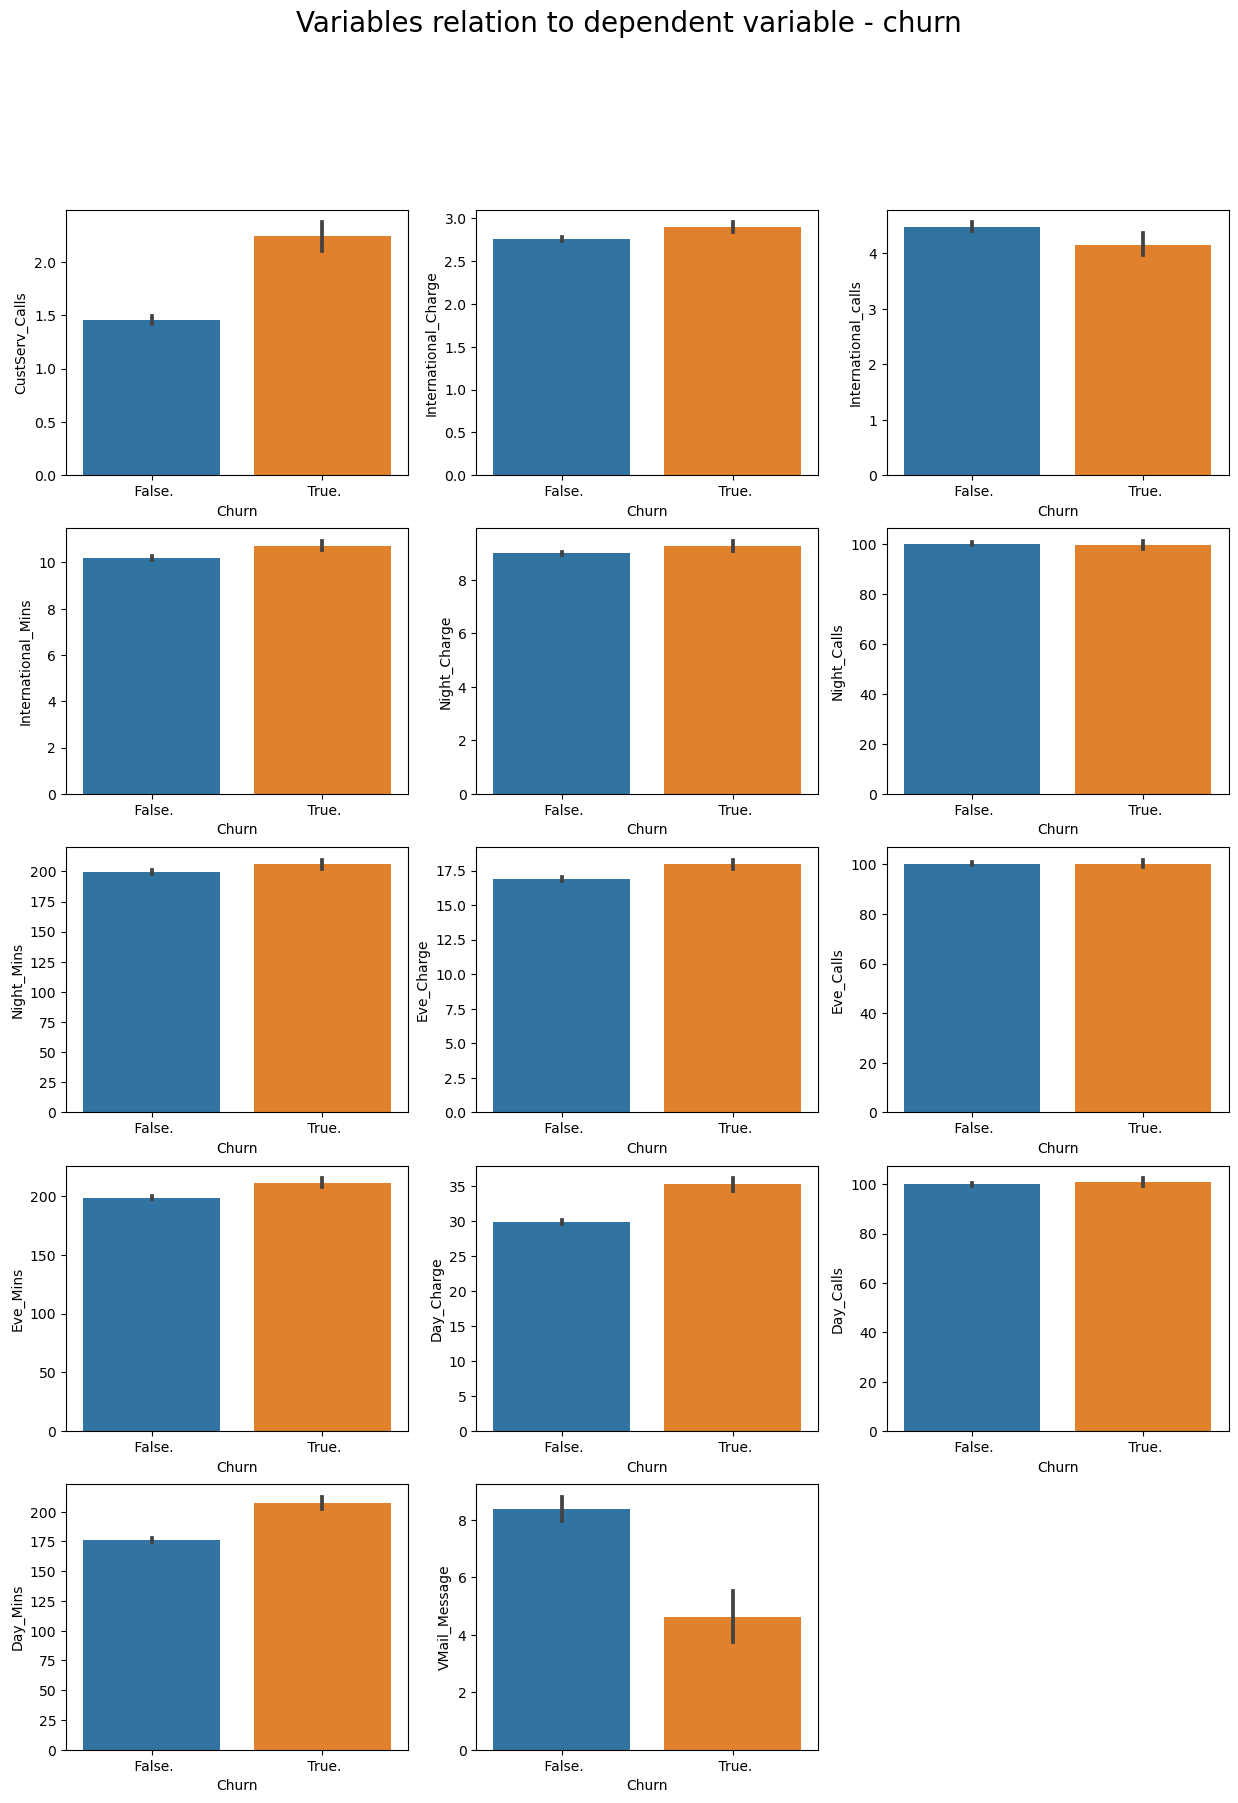

In [18]:
plt.figure(figsize = (15,20))
plt.subplot(5,3,1)
sns.barplot(x = 'Churn',y = 'CustServ_Calls',data = df1)
plt.subplot(5,3,2)
sns.barplot(x = 'Churn',y = 'International_Charge',data = df1)
plt.subplot(5,3,3)
sns.barplot(x = 'Churn',y = 'International_calls',data = df1)
plt.subplot(5,3,4)
sns.barplot(x = 'Churn',y = 'International_Mins',data = df1)
plt.subplot(5,3,5)
sns.barplot(x = 'Churn',y = 'Night_Charge',data = df1)
plt.subplot(5,3,6)
sns.barplot(x = 'Churn',y = 'Night_Calls',data = df1)
plt.subplot(5,3,7)
sns.barplot(x = 'Churn',y = 'Night_Mins',data = df1)
plt.subplot(5,3,8)
sns.barplot(x = 'Churn',y = 'Eve_Charge',data = df1)
plt.subplot(5,3,9)
sns.barplot(x = 'Churn',y = 'Eve_Calls',data = df1)
plt.subplot(5,3,10)
sns.barplot(x = 'Churn',y = 'Eve_Mins',data = df1)
plt.subplot(5,3,11)
sns.barplot(x = 'Churn',y = 'Day_Charge',data = df1)
plt.subplot(5,3,12)
sns.barplot(x = 'Churn',y = 'Day_Calls',data = df1)
plt.subplot(5,3,13)
sns.barplot(x = 'Churn',y = 'Day_Mins',data = df1)
plt.subplot(5,3,14)
sns.barplot(x = 'Churn',y = 'VMail_Message',data = df1)
plt.suptitle("Variables relation to dependent variable - churn", fontsize = 20)
plt.show()

Above plotting graphs to find the relationships between the features and the customer churn(target variable).

<AxesSubplot: xlabel='State'>

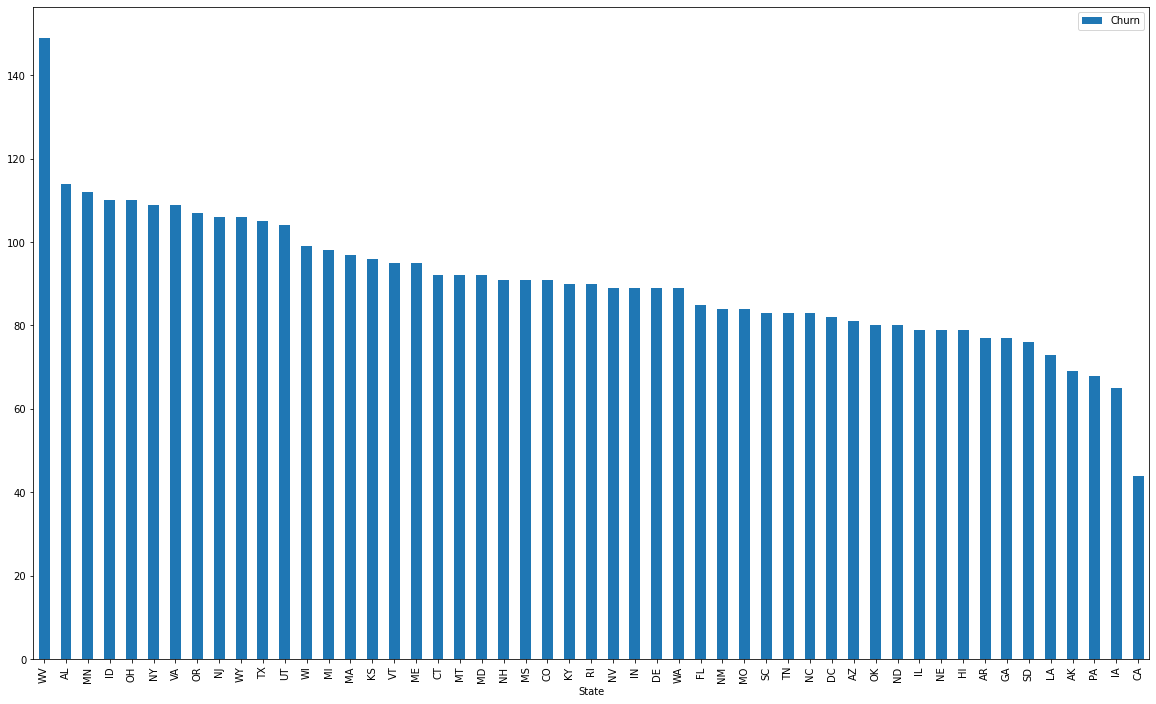

In [19]:
#State vs Churn count
df1.iloc[:,[0,-1]].groupby('State').count().sort_values('Churn',ascending=False).plot(kind='bar', figsize=(20,12))

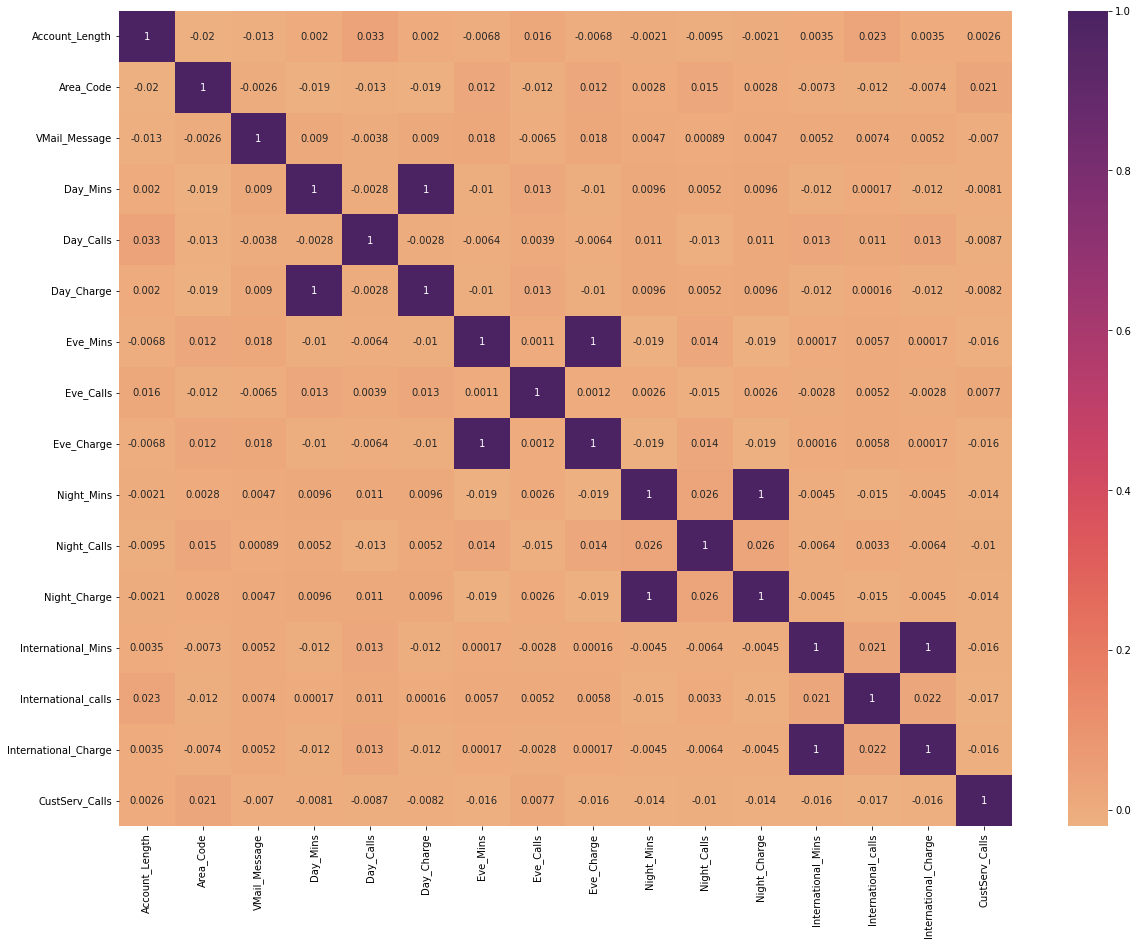

In [20]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(), annot=True, cmap='flare');

From the above Correlation Plot

There are very good correlation between Day Mins & Day Charge, Eve Mins & Eve Charge, Night Mins & Night Charge, International Mins & International Charge

### Encoding

### Label Encoding

In [21]:
df1 = df1.replace({"Churn" : {" False." : 0," True." : 1}})

In [22]:
ohe_fe = ['State','Phone','International_Plan','VMail_Plan']
df1 = pd.get_dummies(df1, columns= ohe_fe)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Columns: 4689 entries, Account_Length to VMail_Plan_ yes
dtypes: float64(8), int64(9), uint8(4672)
memory usage: 21.2 MB


In [24]:
df1.head(10)

,Account_Length,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,...,Phone_ 422-8268,Phone_ 422-8333,Phone_ 422-8344,Phone_ 422-8472,Phone_ 422-9831,Phone_ 422-9964,International_Plan_ no,International_Plan_ yes,VMail_Plan_ no,VMail_Plan_ yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,1,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,1,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,1,0,1,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,1,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,1,1,0
5,118,510,0,223.4,98,37.98,220.6,101,18.75,203.9,...,0,0,0,0,0,0,0,1,1,0
6,121,510,24,218.2,88,37.09,348.5,108,29.62,212.6,...,0,0,0,0,0,0,1,0,0,1
7,147,415,0,157.0,79,26.69,103.1,94,8.76,211.8,...,0,0,0,0,0,0,0,1,1,0
8,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,...,0,0,0,0,0,0,1,0,1,0
9,141,415,37,258.6,84,43.96,222.0,111,18.87,326.4,...,0,0,0,0,0,0,0,1,0,1


### Modeling Buliding

In [25]:
X = df1.drop(columns=['Churn'])
y = df1.Churn

In [26]:
y.value_counts()

0    3961
1     656
Name: Churn, dtype: int64

### Model Buliding For imbalance data

In [27]:
#import module
from sklearn.preprocessing import StandardScaler
# Standardizing numerical features
sc = StandardScaler()

### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [29]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
X_train.shape,X_test.shape

((3693, 4688), (924, 4688))

### Logistic Regression

In [31]:
#Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation 
log_reg = LogisticRegression()

# Step:3 fitting traing data
log_reg.fit(X_train,y_train)

# Step:4 Prediction on test data
log_test_predict = log_reg.predict(X_test)

# Step:5 Prediction on training data
log_train_predict = log_reg.predict(X_train)

#### EVALUATION

#### TRAINING ACCURACY

In [32]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
log_train_accuracy = accuracy_score(log_train_predict,y_train)
print("Training accuracy of Logistic regression model",log_train_accuracy*100)
print("Logistic regression training Classification report: \n",classification_report(log_train_predict,y_train))

Training accuracy of Logistic regression model 100.0
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00       525

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.00      3693



#### TESTING ACCURACY

In [33]:
log_test_accuracy = accuracy_score(log_test_predict,y_test)
print("Testing accuracy of Logistic regression model",log_test_accuracy*100)
print("Logistic regression testing Classification report: \n",classification_report(log_test_predict,y_test))

Testing accuracy of Logistic regression model 85.93073593073593
Logistic regression testing Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92       923
           1       0.01      1.00      0.02         1

    accuracy                           0.86       924
   macro avg       0.50      0.93      0.47       924
weighted avg       1.00      0.86      0.92       924



### KNN

In [34]:
# Step:1 importing library and object creation
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)

# Step:2 fitting the training data
knn.fit(X_train,y_train)

# Step:3 Prediction on training data
knn_train_predict = knn.predict(X_train)

# Step:4 Prediction on testing data
knn_test_predict = knn.predict(X_test)

#### EVALUATION

#### TRAINING ACCURACY

In [35]:
knn_train_accuracy = accuracy_score(knn_train_predict,y_train)
print("Training accuracy KNN:",knn_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(knn_train_predict,y_train))

Training accuracy KNN: 86.67749796913078
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93      3644
           1       0.08      0.84      0.14        49

    accuracy                           0.87      3693
   macro avg       0.54      0.85      0.54      3693
weighted avg       0.99      0.87      0.92      3693



#### TESTING ACCURACY

In [36]:
knn_test_accuracy = accuracy_score(knn_test_predict,y_test)
print("Testing accuracy KNN:",knn_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(knn_test_predict,y_test))

Testing accuracy KNN: 86.03896103896103
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92       918
           1       0.03      0.67      0.06         6

    accuracy                           0.86       924
   macro avg       0.51      0.76      0.49       924
weighted avg       0.99      0.86      0.92       924



### Decision Tree

In [37]:
# Step:1 importing library and object creation
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Step:2 fitting the training data
dtc.fit(X_train,y_train)

# Step:3 Prediction on training data
dtc_train_predict = dtc.predict(X_train)

# Step:4 Prediction on testing data
dtc_test_predict = dtc.predict(X_test)

#### EVALUATION

#### TRAINING ACCURACY

In [38]:
dtc_train_accuracy = accuracy_score(dtc_train_predict,y_train)
print("Training accuracy Decision Tree:",dtc_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(dtc_train_predict,y_train))

Training accuracy Decision Tree: 100.0
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00       525

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.00      3693



#### TESTING ACCURACY

In [39]:
dtc_test_accuracy = accuracy_score(dtc_test_predict,y_test)
print("Testing accuracy Decision Tree:",dtc_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(dtc_test_predict,y_test))

Testing accuracy Decision Tree: 94.26406926406926
Classification report of training:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       818
           1       0.70      0.87      0.78       106

    accuracy                           0.94       924
   macro avg       0.84      0.91      0.87       924
weighted avg       0.95      0.94      0.95       924



#### Hyper parameter tuning of DecisionTree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(
    criterion='gini',       # Split criterion: {'gini', 'entropy'}
    splitter='best',        # Split strategy: {'best', 'random'}
    max_depth=None,         # Maximum depth of the tree
    min_samples_split=2,    # Minimum number of samples required to split an internal node
    min_samples_leaf=1,     # Minimum number of samples required to be at a leaf node
    min_weight_fraction_leaf=0.0,  # Minimum weighted fraction of the sum total of weights required to be at a leaf node
    max_features=None,      # Maximum number of features to consider when looking for the best split
    random_state=None,      # Seed for random number generator
    max_leaf_nodes=None,    # Maximum number of leaf nodes in the tree
    min_impurity_decrease=0.0,     # Minimum impurity decrease required for a split to happen
    class_weight=None,      # Weights associated with classes
    ccp_alpha=0.0           # Complexity parameter used for Minimal Cost-Complexity Pruning
)

# Step 2: Fitting the training data
dtc.fit(X_train, y_train)

# Step 3: Prediction on training data
dtc_train_predict = dtc.predict(X_train)

# Step 4: Prediction on testing data
dtc_test_predict = dtc.predict(X_test)

In [41]:
print("Tuned Parameters: ", dtc.get_params())
print("Train Score: ", dtc.score(X_train, y_train))
print("Test Score: ", dtc.score(X_test, y_test))

Tuned Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Train Score:  1.0
Test Score:  0.9404761904761905


### Random Forrest Classifier

In [43]:
# Step:1 importing library and object creation
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100) 

# Step:2 fitting the training data
rfc.fit(X_train,y_train)

# Step:3 Prediction on training data
rfc_train_predict = rfc.predict(X_train)

# Step:4 Prediction on testing data
rfc_test_predict = rfc.predict(X_test)

#### EVALUATION

#### TRAINING ACCURACY

In [44]:
rfc_train_accuracy = accuracy_score(rfc_train_predict,y_train)
print("Training accuracy RFC classifier:",rfc_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(rfc_train_predict,y_train))

Training accuracy RFC classifier: 100.0
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00       525

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.00      3693



#### TESTING ACCURACY

In [45]:
rfc_test_accuracy = accuracy_score(rfc_test_predict,y_test)
print("Testing accuracy RFC classifier:",rfc_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(rfc_test_predict,y_test))

Testing accuracy RFC classifier: 91.23376623376623
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95       870
           1       0.40      0.96      0.56        54

    accuracy                           0.91       924
   macro avg       0.70      0.94      0.76       924
weighted avg       0.96      0.91      0.93       924



In [46]:
from sklearn.model_selection import GridSearchCV

# Step 1: Create the RandomForestClassifier object
rfc = RandomForestClassifier(n_estimators=100)

# Step 2: Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Step 3: Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

# Step 4: Fit the training data to perform the hyperparameter tuning
grid_search.fit(X_train, y_train)

# Step 5: Print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score:  0.9060361361394399


### Gradient Boosting Classifier

In [43]:
#Step:1 importing library
from sklearn.ensemble import GradientBoostingClassifier

# Step:2 Object creation 
gbc_reg = GradientBoostingClassifier()

# Step:3 fitting traing data
gbc_reg.fit(X_train,y_train)

# Step:4 Prediction on test data
gbc_test_predict = gbc_reg.predict(X_test)

# Step:5 Prediction on training data
gbc_train_predict = gbc_reg.predict(X_train)

#### EVALUATION

#### TRAINING ACCURACY

In [44]:
gbc_train_accuracy = accuracy_score(gbc_train_predict,y_train)
print("Training accuracy of Gradient Boosting model",gbc_train_accuracy*100)
print("Gradient Boosting training Classification report: \n",classification_report(gbc_train_predict,y_train))

Training accuracy of Gradient Boosting model 96.04657460059572
Gradient Boosting training Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      3278
           1       0.76      0.96      0.84       415

    accuracy                           0.96      3693
   macro avg       0.88      0.96      0.91      3693
weighted avg       0.97      0.96      0.96      3693



#### TESTING ACCURACY

In [45]:
gbc_test_accuracy = accuracy_score(gbc_test_predict,y_test)
print("Testing accuracy of Gradient Boosting model",gbc_test_accuracy*100)
print("Gradient Boosting testing Classification report: \n",classification_report(gbc_test_predict,y_test))

Testing accuracy of Gradient Boosting model 94.58874458874459
Gradient Boosting testing Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       823
           1       0.69      0.90      0.78       101

    accuracy                           0.95       924
   macro avg       0.84      0.93      0.88       924
weighted avg       0.96      0.95      0.95       924



### Xgboost Classifier

In [46]:
# Step:1 importing library and object creation
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()

# Step:2 fitting the training data
xgb.fit(X_train,y_train)

# Step:3 Prediction on training data
xgb_train_predict = xgb.predict(X_train)

# Step:4 Prediction on testing data
xgb_test_predict = xgb.predict(X_test)

#### EVALUATION

#### TRAINING ACCURACY

In [47]:
xgb_train_accuracy = accuracy_score(xgb_train_predict,y_train)
print("Training accuracy XGB classifier:",xgb_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(xgb_train_predict,y_train))

Training accuracy XGB classifier: 100.0
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00       525

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.00      3693



#### TESTING ACCURACY

In [48]:
xgb_test_accuracy = accuracy_score(xgb_test_predict,y_test)
print("Testing accuracy XGB classifier:",xgb_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(xgb_test_predict,y_test))

Testing accuracy XGB classifier: 95.67099567099568
Classification report of training:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       817
           1       0.76      0.93      0.83       107

    accuracy                           0.96       924
   macro avg       0.87      0.94      0.90       924
weighted avg       0.96      0.96      0.96       924



### Naive bayes

In [49]:
# Step:1 importing library and object creation
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

# Step:2 fitting the training data
nb.fit(X_train,y_train)

# Step:3 Prediction on training data
nb_train_predict = nb.predict(X_train)

# Step:4 Prediction on testing data
nb_test_predict = nb.predict(X_test)

#### EVALUATION

#### TRAINING ACCURACY

In [50]:
nb_train_accuracy = accuracy_score(nb_train_predict,y_train)
print("Training accuracy Naive bayes classifier:",nb_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(nb_train_predict,y_train))

Training accuracy Naive bayes classifier: 100.0
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00       525

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.00      3693



#### TESTING ACCURACY

In [51]:
nb_test_accuracy = accuracy_score(nb_test_predict,y_test)
print("Testing accuracy Naive bayes classifier:",nb_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(nb_test_predict,y_test))

Testing accuracy Naive bayes classifier: 14.177489177489178
Classification report of training:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.14      0.25       924

    accuracy                           0.14       924
   macro avg       0.50      0.07      0.12       924
weighted avg       1.00      0.14      0.25       924



D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ANN [MLP Classifier]

In [52]:
# Step:1 Importing library and object creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      random_state=42)

# Step:2 Fitting the training data
model.fit(X_train,y_train)

# Step:3 Predicting the probability
mlp_prdict_probability = model.predict_proba(X_test)
mlp_prdict_probability

# Step:4 Prediction on test data
mlp_test_predict = model.predict(X_test)

# Step:5 Prediction on training data
mlp_train_predict = model.predict(X_train)

D:\Installed\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### EVALUATION

#### TRAINING ACCURACY

In [53]:
mlp_train_accuracy = accuracy_score(mlp_train_predict,y_train)
print("Training accuracy of MLP model is:",mlp_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(mlp_train_predict,y_train))

Training accuracy of MLP model is: 98.64608719198483
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      3218
           1       0.90      1.00      0.95       475

    accuracy                           0.99      3693
   macro avg       0.95      0.99      0.97      3693
weighted avg       0.99      0.99      0.99      3693



#### TESTING ACCURACY

In [54]:
mlp_test_accuracy = accuracy_score(mlp_test_predict,y_test)
print("Testing accuracy of MLP model is:",mlp_test_accuracy*100)
print("Classification report of testing:"'\n',classification_report(mlp_test_predict,y_test))

Testing accuracy of MLP model is: 85.93073593073593
Classification report of testing:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92       923
           1       0.01      1.00      0.02         1

    accuracy                           0.86       924
   macro avg       0.50      0.93      0.47       924
weighted avg       1.00      0.86      0.92       924



### Support Vector Classifier

In [55]:
# Step:1 importing library and object creation
from sklearn.svm import SVC

svc_model = SVC() 

# Step:2 fitting the training data
svc_model.fit(X_train,y_train)

# Step:3 Prediction on training data
svc_model_train_predict = svc_model.predict(X_train)

# Step:4 Prediction on testing data
svc_model_test_predict = svc_model.predict(X_test)

#### EVALUATION

#### TRAINING ACCURACY

In [56]:
svc_model_train_accuracy = accuracy_score(svc_model_train_predict,y_train)
print("Training accuracy RFC classifier:",svc_model_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(svc_model_train_predict,y_train))

Training accuracy RFC classifier: 98.4565393988627
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      3225
           1       0.89      1.00      0.94       468

    accuracy                           0.98      3693
   macro avg       0.95      0.99      0.97      3693
weighted avg       0.99      0.98      0.98      3693



#### TESTING ACCURACY

In [57]:
svc_model_test_accuracy = accuracy_score(svc_model_test_predict,y_test)
print("Testing accuracy RFC classifier:",svc_model_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(svc_model_test_predict,y_test))

Testing accuracy RFC classifier: 85.82251082251082
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92       924
           1       0.00      0.00      0.00         0

    accuracy                           0.86       924
   macro avg       0.50      0.43      0.46       924
weighted avg       1.00      0.86      0.92       924



D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ExtraTreesClassifier

In [58]:
# Step:1 importing library and object creation
from sklearn.ensemble import ExtraTreesClassifier

# Building the model
etf = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)

# Step:2 fitting the training data
etf.fit(X_train,y_train)

# Step:3 Prediction on training data
etf_train_predict = etf.predict(X_train)

# Step:4 Prediction on testing data
etf_test_predict = etf.predict(X_test)

#### EVALUATION

#### TRAINING ACCURACY

In [59]:
etf_train_accuracy = accuracy_score(etf_train_predict,y_train)
print("Training accuracy RFC classifier:",etf_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(etf_train_predict,y_train))

Training accuracy RFC classifier: 100.0
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00       525

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.00      3693



#### TESTING ACCURACY

In [60]:
etf_test_accuracy = accuracy_score(etf_test_predict,y_test)
print("Testing accuracy XGB classifier:",etf_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(etf_test_predict,y_test))

Testing accuracy XGB classifier: 86.68831168831169
Classification report of training:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93       884
           1       0.18      0.60      0.28        40

    accuracy                           0.87       924
   macro avg       0.58      0.74      0.60       924
weighted avg       0.95      0.87      0.90       924



### LightGBM Classifier

In [61]:
# Step:1 importing library and object creation
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()

# Step:2 fitting the training data
lgbm.fit(X_train,y_train)

# Step:3 Prediction on training data
lgbm_train_predict = lgbm.predict(X_train)

# Step:4 Prediction on testing data
lgbm_test_predict = lgbm.predict(X_test)

#### EVALUATION

#### TRAINING ACCURACY

In [62]:
lgbm_train_accuracy = accuracy_score(lgbm_train_predict,y_train)
print("Training accuracy LightGBM classifier:",lgbm_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(lgbm_train_predict,y_train))

Training accuracy LightGBM classifier: 99.9458434876794
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3170
           1       1.00      1.00      1.00       523

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.00      3693



#### TESTING ACCURACY

In [63]:
lgbm_test_accuracy = accuracy_score(lgbm_test_predict,y_test)
print("Testing accuracy LightGBM classifier:",lgbm_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(lgbm_test_predict,y_test))

Testing accuracy LightGBM classifier: 95.67099567099568
Classification report of training:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       815
           1       0.76      0.92      0.83       109

    accuracy                           0.96       924
   macro avg       0.88      0.94      0.90       924
weighted avg       0.96      0.96      0.96       924



### Catboost Classifier

In [64]:
# Step:1 importing library and object creation
from catboost import CatBoostClassifier
cbc = CatBoostClassifier()

# Step:2 fitting the training data
cbc.fit(X_train,y_train)

# Step:3 Prediction on training data
cbc_train_predict = cbc.predict(X_train)

# Step:4 Prediction on testing data
cbc_test_predict = cbc.predict(X_test)

Learning rate set to 0.017997
0:	learn: 0.6758141	total: 203ms	remaining: 3m 23s
1:	learn: 0.6591509	total: 263ms	remaining: 2m 11s
2:	learn: 0.6407671	total: 324ms	remaining: 1m 47s
3:	learn: 0.6241740	total: 391ms	remaining: 1m 37s
4:	learn: 0.6127028	total: 451ms	remaining: 1m 29s
5:	learn: 0.5946090	total: 511ms	remaining: 1m 24s
6:	learn: 0.5823139	total: 572ms	remaining: 1m 21s
7:	learn: 0.5670035	total: 642ms	remaining: 1m 19s
8:	learn: 0.5529677	total: 702ms	remaining: 1m 17s
9:	learn: 0.5398404	total: 763ms	remaining: 1m 15s
10:	learn: 0.5258885	total: 828ms	remaining: 1m 14s
11:	learn: 0.5153114	total: 889ms	remaining: 1m 13s
12:	learn: 0.5062436	total: 952ms	remaining: 1m 12s
13:	learn: 0.4925051	total: 1.01s	remaining: 1m 11s
14:	learn: 0.4839319	total: 1.08s	remaining: 1m 10s
15:	learn: 0.4738331	total: 1.14s	remaining: 1m 10s
16:	learn: 0.4622940	total: 1.2s	remaining: 1m 9s
17:	learn: 0.4528210	total: 1.26s	remaining: 1m 8s
18:	learn: 0.4437021	total: 1.32s	remaining: 1m

162:	learn: 0.1603415	total: 7.07s	remaining: 36.3s
163:	learn: 0.1600875	total: 7.1s	remaining: 36.2s
164:	learn: 0.1595778	total: 7.16s	remaining: 36.2s
165:	learn: 0.1593835	total: 7.2s	remaining: 36.2s
166:	learn: 0.1592424	total: 7.23s	remaining: 36s
167:	learn: 0.1591782	total: 7.25s	remaining: 35.9s
168:	learn: 0.1591039	total: 7.28s	remaining: 35.8s
169:	learn: 0.1588395	total: 7.31s	remaining: 35.7s
170:	learn: 0.1587078	total: 7.34s	remaining: 35.6s
171:	learn: 0.1586614	total: 7.37s	remaining: 35.5s
172:	learn: 0.1582469	total: 7.4s	remaining: 35.4s
173:	learn: 0.1579519	total: 7.43s	remaining: 35.3s
174:	learn: 0.1577244	total: 7.45s	remaining: 35.1s
175:	learn: 0.1576326	total: 7.55s	remaining: 35.4s
176:	learn: 0.1574962	total: 7.58s	remaining: 35.3s
177:	learn: 0.1572146	total: 7.63s	remaining: 35.2s
178:	learn: 0.1567493	total: 7.67s	remaining: 35.2s
179:	learn: 0.1564405	total: 7.71s	remaining: 35.1s
180:	learn: 0.1563767	total: 7.74s	remaining: 35s
181:	learn: 0.15618

322:	learn: 0.1438786	total: 13.4s	remaining: 28s
323:	learn: 0.1438362	total: 13.4s	remaining: 27.9s
324:	learn: 0.1437828	total: 13.4s	remaining: 27.9s
325:	learn: 0.1437377	total: 13.5s	remaining: 27.8s
326:	learn: 0.1436706	total: 13.5s	remaining: 27.8s
327:	learn: 0.1436161	total: 13.5s	remaining: 27.7s
328:	learn: 0.1433751	total: 13.6s	remaining: 27.7s
329:	learn: 0.1433251	total: 13.6s	remaining: 27.6s
330:	learn: 0.1432933	total: 13.6s	remaining: 27.6s
331:	learn: 0.1432470	total: 13.7s	remaining: 27.5s
332:	learn: 0.1431950	total: 13.7s	remaining: 27.5s
333:	learn: 0.1431455	total: 13.8s	remaining: 27.4s
334:	learn: 0.1431045	total: 13.8s	remaining: 27.4s
335:	learn: 0.1430688	total: 13.8s	remaining: 27.3s
336:	learn: 0.1430190	total: 13.9s	remaining: 27.3s
337:	learn: 0.1429746	total: 13.9s	remaining: 27.2s
338:	learn: 0.1428193	total: 13.9s	remaining: 27.2s
339:	learn: 0.1427842	total: 14s	remaining: 27.1s
340:	learn: 0.1427318	total: 14s	remaining: 27.1s
341:	learn: 0.1426

481:	learn: 0.1333293	total: 19.1s	remaining: 20.6s
482:	learn: 0.1332726	total: 19.2s	remaining: 20.5s
483:	learn: 0.1332102	total: 19.2s	remaining: 20.5s
484:	learn: 0.1331466	total: 19.2s	remaining: 20.4s
485:	learn: 0.1330855	total: 19.3s	remaining: 20.4s
486:	learn: 0.1330264	total: 19.3s	remaining: 20.3s
487:	learn: 0.1329701	total: 19.4s	remaining: 20.3s
488:	learn: 0.1329164	total: 19.4s	remaining: 20.3s
489:	learn: 0.1328564	total: 19.4s	remaining: 20.2s
490:	learn: 0.1327985	total: 19.5s	remaining: 20.2s
491:	learn: 0.1327391	total: 19.5s	remaining: 20.1s
492:	learn: 0.1326796	total: 19.5s	remaining: 20.1s
493:	learn: 0.1326216	total: 19.6s	remaining: 20.1s
494:	learn: 0.1325635	total: 19.6s	remaining: 20s
495:	learn: 0.1325020	total: 19.7s	remaining: 20s
496:	learn: 0.1324413	total: 19.7s	remaining: 19.9s
497:	learn: 0.1323853	total: 19.7s	remaining: 19.9s
498:	learn: 0.1323263	total: 19.8s	remaining: 19.8s
499:	learn: 0.1322661	total: 19.8s	remaining: 19.8s
500:	learn: 0.13

642:	learn: 0.1243606	total: 25.1s	remaining: 13.9s
643:	learn: 0.1243108	total: 25.1s	remaining: 13.9s
644:	learn: 0.1242616	total: 25.2s	remaining: 13.9s
645:	learn: 0.1242121	total: 25.2s	remaining: 13.8s
646:	learn: 0.1241624	total: 25.3s	remaining: 13.8s
647:	learn: 0.1241131	total: 25.3s	remaining: 13.7s
648:	learn: 0.1240637	total: 25.3s	remaining: 13.7s
649:	learn: 0.1240143	total: 25.4s	remaining: 13.7s
650:	learn: 0.1239653	total: 25.4s	remaining: 13.6s
651:	learn: 0.1239159	total: 25.5s	remaining: 13.6s
652:	learn: 0.1238675	total: 25.5s	remaining: 13.5s
653:	learn: 0.1238183	total: 25.5s	remaining: 13.5s
654:	learn: 0.1237692	total: 25.6s	remaining: 13.5s
655:	learn: 0.1237206	total: 25.6s	remaining: 13.4s
656:	learn: 0.1236717	total: 25.7s	remaining: 13.4s
657:	learn: 0.1236233	total: 25.7s	remaining: 13.4s
658:	learn: 0.1235748	total: 25.7s	remaining: 13.3s
659:	learn: 0.1235260	total: 25.8s	remaining: 13.3s
660:	learn: 0.1234780	total: 25.8s	remaining: 13.2s
661:	learn: 

801:	learn: 0.1146710	total: 31.1s	remaining: 7.68s
802:	learn: 0.1146309	total: 31.1s	remaining: 7.64s
803:	learn: 0.1145906	total: 31.2s	remaining: 7.6s
804:	learn: 0.1145504	total: 31.2s	remaining: 7.56s
805:	learn: 0.1145103	total: 31.2s	remaining: 7.52s
806:	learn: 0.1144704	total: 31.3s	remaining: 7.48s
807:	learn: 0.1144303	total: 31.3s	remaining: 7.44s
808:	learn: 0.1143904	total: 31.4s	remaining: 7.4s
809:	learn: 0.1143505	total: 31.4s	remaining: 7.36s
810:	learn: 0.1143106	total: 31.4s	remaining: 7.32s
811:	learn: 0.1142709	total: 31.5s	remaining: 7.28s
812:	learn: 0.1142313	total: 31.5s	remaining: 7.24s
813:	learn: 0.1141916	total: 31.5s	remaining: 7.2s
814:	learn: 0.1141521	total: 31.6s	remaining: 7.16s
815:	learn: 0.1141124	total: 31.6s	remaining: 7.13s
816:	learn: 0.1140729	total: 31.6s	remaining: 7.08s
817:	learn: 0.1140335	total: 31.7s	remaining: 7.04s
818:	learn: 0.1139941	total: 31.7s	remaining: 7.01s
819:	learn: 0.1139547	total: 31.7s	remaining: 6.97s
820:	learn: 0.1

965:	learn: 0.1061593	total: 37.1s	remaining: 1.31s
966:	learn: 0.1061261	total: 37.2s	remaining: 1.27s
967:	learn: 0.1060929	total: 37.2s	remaining: 1.23s
968:	learn: 0.1060597	total: 37.2s	remaining: 1.19s
969:	learn: 0.1060267	total: 37.3s	remaining: 1.15s
970:	learn: 0.1059936	total: 37.3s	remaining: 1.11s
971:	learn: 0.1059606	total: 37.4s	remaining: 1.08s
972:	learn: 0.1059277	total: 37.4s	remaining: 1.04s
973:	learn: 0.1058948	total: 37.4s	remaining: 999ms
974:	learn: 0.1058620	total: 37.5s	remaining: 961ms
975:	learn: 0.1058292	total: 37.5s	remaining: 922ms
976:	learn: 0.1057964	total: 37.5s	remaining: 884ms
977:	learn: 0.1057637	total: 37.6s	remaining: 845ms
978:	learn: 0.1057310	total: 37.6s	remaining: 807ms
979:	learn: 0.1056982	total: 37.6s	remaining: 768ms
980:	learn: 0.1056657	total: 37.7s	remaining: 730ms
981:	learn: 0.1056331	total: 37.7s	remaining: 691ms
982:	learn: 0.1056005	total: 37.7s	remaining: 653ms
983:	learn: 0.1055680	total: 37.8s	remaining: 614ms
984:	learn: 

#### EVALUATION

#### TRAINING ACCURACY

In [65]:
cbc_train_accuracy = accuracy_score(cbc_train_predict,y_train)
print("Training accuracy Catboost classifier:",cbc_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(cbc_train_predict,y_train))

Training accuracy Catboost classifier: 96.6693744922827
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      3279
           1       0.78      0.99      0.87       414

    accuracy                           0.97      3693
   macro avg       0.89      0.97      0.92      3693
weighted avg       0.97      0.97      0.97      3693



#### TESTING ACCURACY

In [66]:
cbc_test_accuracy = accuracy_score(cbc_test_predict,y_test)
print("Testing accuracy LightGBM classifier:",cbc_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(cbc_test_predict,y_test))

Testing accuracy LightGBM classifier: 95.23809523809523
Classification report of training:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       823
           1       0.72      0.93      0.81       101

    accuracy                           0.95       924
   macro avg       0.85      0.94      0.89       924
weighted avg       0.96      0.95      0.96       924



### Model Buliding For Balaced data with SMOTE()

In [67]:
from imblearn.over_sampling import SMOTE
smote = SMOTE() ## object creation

In [68]:
X_train_smote, y_train_smote = smote.fit_resample(X,y)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_smote, y_train_smote, test_size=0.20, random_state=42,stratify=y_train_smote)

In [71]:
#import module
from sklearn.preprocessing import StandardScaler
# Standardizing numerical features
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

In [72]:
X_train1.shape, X_test1.shape

((6337, 4688), (1585, 4688))

In [73]:
#y_train2.value_counts(), y_test2.value_counts()
from collections import Counter
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({0: 3961, 1: 656})
SMOTE Classes Counter({0: 3961, 1: 3961})


### Logistic Regression

In [74]:
#Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation 
log_reg1 = LogisticRegression()

# Step:3 fitting traing data
log_reg1.fit(X_train1,y_train1)

# Step:4 Prediction on test data
log_test_predict1 = log_reg1.predict(X_test1)

# Step:5 Prediction on training data
log_train_predict1 = log_reg1.predict(X_train1)

#### EVALUATION

#### TRAINING ACCURACY

In [75]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
log_train_accuracy1 = accuracy_score(log_train_predict1,y_train1)
print("Training accuracy of Logistic regression model after SMOTE",log_train_accuracy1*100)
print("Logistic regression training Classification report after SMOTE: \n",classification_report(log_train_predict1,y_train1))

Training accuracy of Logistic regression model after SMOTE 100.0
Logistic regression training Classification report after SMOTE: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00      3169

    accuracy                           1.00      6337
   macro avg       1.00      1.00      1.00      6337
weighted avg       1.00      1.00      1.00      6337



#### TESTING ACCURACY

In [76]:
log_test_accuracy1 = accuracy_score(log_test_predict1,y_test1)
print("Testing accuracy of Logistic regression model after SMOTE",log_test_accuracy1*100)
print("Logistic regression testing Classification report after SMOTE: \n",classification_report(log_test_predict1,y_test1))

Testing accuracy of Logistic regression model after SMOTE 65.55205047318611
Logistic regression testing Classification report after SMOTE: 
               precision    recall  f1-score   support

           0       0.32      0.97      0.48       261
           1       0.99      0.59      0.74      1324

    accuracy                           0.66      1585
   macro avg       0.66      0.78      0.61      1585
weighted avg       0.88      0.66      0.70      1585



In [77]:
# Area Under Curvefrom sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test1, log_test_predict1)
auc

0.6557321321665583

In [78]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_test1, log_test_predict1)
threshold

array([2, 1, 0], dtype=int64)

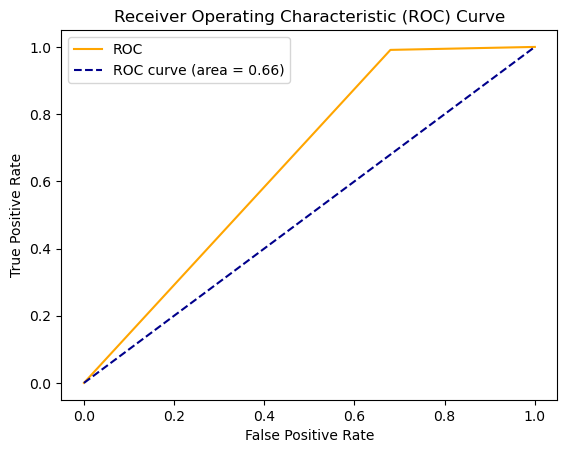

In [79]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

[0.         0.00126263 0.79545455 0.79545455 0.80050505 0.80050505
 0.80808081 0.80808081 0.81060606 0.81060606 0.81565657 0.81565657
 0.83080808 0.83080808 0.83585859 0.83585859 0.83712121 0.83712121
 0.83838384 0.83838384 0.83964646 0.83964646 0.8459596  0.8459596
 0.84722222 0.84722222 0.84848485 0.84848485 0.84974747 0.84974747
 0.85479798 0.85479798 0.85732323 0.85732323 0.85858586 0.85858586
 0.85984848 0.85984848 0.86111111 0.86111111 0.86237374 0.86237374
 0.86489899 0.86489899 0.86742424 0.86742424 0.86868687 0.86868687
 0.87121212 0.87121212 0.87373737 0.87373737 0.875      0.875
 0.87626263 0.87626263 0.87752525 0.87752525 0.87878788 0.87878788
 0.88383838 0.88383838 0.88636364 0.88636364 0.88762626 0.88762626
 0.88888889 0.88888889 0.89015152 0.89015152 0.89141414 0.89141414
 0.89267677 0.89267677 0.89520202 0.89520202 0.89646465 0.89646465
 0.89772727 0.89772727 0.90025253 0.90025253 0.90151515 0.90151515
 0.90277778 0.90277778 0.9040404  0.9040404  0.90530303 0.90530303
 

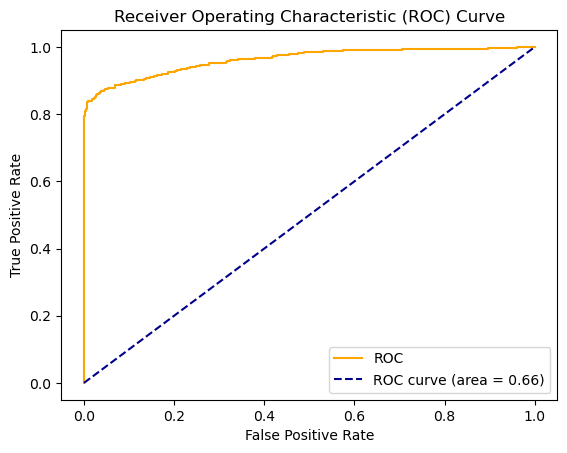

In [80]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

fpr, tpr, thresholds = roc_curve(y_test1, log_reg1.predict_proba(X_test1)[:,1])
print(tpr)
print(fpr)
print(thresholds)
print(roc_auc_score(y_test1,log_reg1.predict_proba(X_test1)[:,1]))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

### KNN

In [81]:
# Step:1 importing library and object creation
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=9)

# Step:2 fitting the training data
knn1.fit(X_train1,y_train1)

# Step:3 Prediction on training data
knn_train_predict1 = knn1.predict(X_train1)

# Step:4 Prediction on testing data
knn_test_predict1 = knn1.predict(X_test1)

#### EVALUATION

#### TRAINING ACCURACY

In [82]:
knn_train_accuracy1 = accuracy_score(knn_train_predict1,y_train1)
print("Training accuracy KNN:",knn_train_accuracy1*100)
print("Classification report of training after SMOTE:"'\n',classification_report(knn_train_predict1,y_train1))

Training accuracy KNN: 50.00789016884961
Classification report of training after SMOTE:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67      6337

    accuracy                           0.50      6337
   macro avg       0.50      0.25      0.33      6337
weighted avg       1.00      0.50      0.67      6337



D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### TESTING ACCURACY

In [83]:
knn_test_accuracy1 = accuracy_score(knn_test_predict1,y_test1)
print("Testing accuracy KNN after SMOTE:",knn_test_accuracy1*100)
print("Classification report of training after SMOTE:"'\n',classification_report(knn_test_predict1,y_test1))

Testing accuracy KNN after SMOTE: 49.968454258675074
Classification report of training after SMOTE:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67      1585

    accuracy                           0.50      1585
   macro avg       0.50      0.25      0.33      1585
weighted avg       1.00      0.50      0.67      1585



D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(knn_test_predict1,y_test1)
threshold

D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


array([2, 1, 0], dtype=int64)

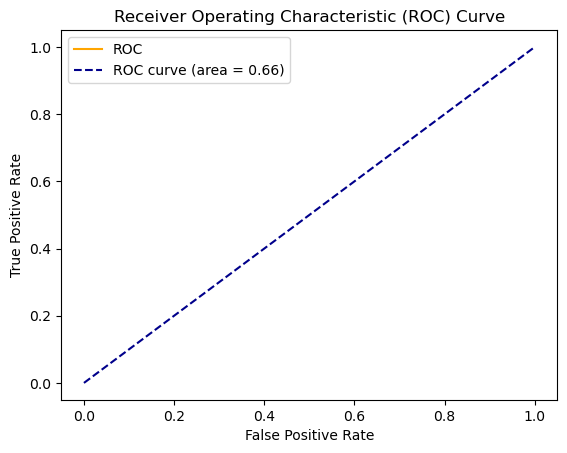

In [85]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### DecisionTreeClassifier

In [86]:
# Step:1 importing library and object creation
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier()

# Step:2 fitting the training data
dtc1.fit(X_train1,y_train1)

# Step:3 Prediction on training data
dtc_train_predict1 = dtc1.predict(X_train1)

# Step:4 Prediction on testing data
dtc_test_predict1 = dtc1.predict(X_test1)

#### EVALUATION

#### TRAINING ACCURACY

In [87]:
dtc_train_accuracy1 = accuracy_score(dtc_train_predict1,y_train1)
print("Training accuracy Decision Tree:",dtc_train_accuracy1*100)
print("Classification report of training after SMOTE:"'\n',classification_report(dtc_train_predict1,y_train1))

Training accuracy Decision Tree: 100.0
Classification report of training after SMOTE:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00      3169

    accuracy                           1.00      6337
   macro avg       1.00      1.00      1.00      6337
weighted avg       1.00      1.00      1.00      6337



#### TESTING ACCURACY

In [88]:
dtc_test_accuracy1 = accuracy_score(dtc_test_predict1,y_test1)
print("Testing accuracy Decision Tree after SMOTE:",dtc_test_accuracy1*100)
print("Classification report of training after SMOTE:"'\n',classification_report(dtc_test_predict1,y_test1))

Testing accuracy Decision Tree after SMOTE: 92.49211356466877
Classification report of training after SMOTE:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       774
           1       0.94      0.91      0.93       811

    accuracy                           0.92      1585
   macro avg       0.92      0.93      0.92      1585
weighted avg       0.93      0.92      0.92      1585



In [89]:
# Area Under Curvefrom sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(dtc_test_predict1,y_test1)
auc

0.9251601844151955

In [90]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(dtc_test_predict1,y_test1)
threshold

array([2, 1, 0], dtype=int64)

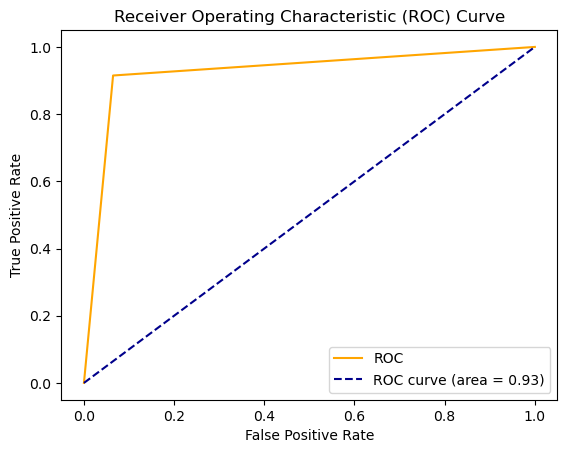

In [91]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Hyper parameter tunning for DecisionTree

In [92]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [93]:
# Define the parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [94]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(dtc1, param_grid, cv=5)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10]})

In [95]:
# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5}
Best Score:  0.6412903129427173


In [97]:
dtc1_model = DecisionTreeClassifier(max_depth= 7, min_samples_leaf= 1, min_samples_split= 5,criterion = 'gini', max_features = 'sqrt')

In [98]:
dtc1_model.fit(X_train1,y_train1)

DecisionTreeClassifier(max_depth=7, max_features='sqrt', min_samples_split=5)

In [99]:
dtc1_model_test_predict = dtc1_model.predict(X_test1)

In [100]:
print(classification_report(y_test1, dtc1_model_test_predict))

              precision    recall  f1-score   support

           0       0.72      0.11      0.19       793
           1       0.52      0.96      0.67       792

    accuracy                           0.53      1585
   macro avg       0.62      0.53      0.43      1585
weighted avg       0.62      0.53      0.43      1585



### Random Forrest Classifier

In [101]:
# Step:1 importing library and object creation
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier(n_estimators = 100) 

# Step:2 fitting the training data
rfc1.fit(X_train1,y_train1)

# Step:3 Prediction on training data
rfc_train_predict1 = rfc1.predict(X_train1)

# Step:4 Prediction on testing data
rfc_test_predict1 = rfc1.predict(X_test1)

#### EVALUATION

#### TRAINING ACCURACY

In [102]:
rfc_train_accuracy1 = accuracy_score(rfc_train_predict1,y_train1)
print("Training accuracy RFC classifier:",rfc_train_accuracy1*100)
print("Classification report of training:"'\n',classification_report(rfc_train_predict1,y_train1))

Training accuracy RFC classifier: 100.0
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00      3169

    accuracy                           1.00      6337
   macro avg       1.00      1.00      1.00      6337
weighted avg       1.00      1.00      1.00      6337



#### TESTING ACCURACY

In [103]:
rfc_test_accuracy1 = accuracy_score(rfc_test_predict1,y_test1)
print("Testing accuracy RFC classifier:",rfc_test_accuracy1*100)
print("Classification report of training:"'\n',classification_report(rfc_test_predict1,y_test1))

Testing accuracy RFC classifier: 96.21451104100946
Classification report of training:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       797
           1       0.96      0.96      0.96       788

    accuracy                           0.96      1585
   macro avg       0.96      0.96      0.96      1585
weighted avg       0.96      0.96      0.96      1585



### Gradient Boosting Classifier

In [104]:
#Step:1 importing library
from sklearn.ensemble import GradientBoostingClassifier

# Step:2 Object creation 
gbc_reg1 = GradientBoostingClassifier()

# Step:3 fitting traing data
gbc_reg1.fit(X_train1,y_train1)

# Step:4 Prediction on test data
gbc_test_predict1 = gbc_reg1.predict(X_test1)

# Step:5 Prediction on training data
gbc_train_predict1 = gbc_reg1.predict(X_train1)

#### EVALUATION

#### TRAINING ACCURACY

In [105]:
gbc_train_accuracy1 = accuracy_score(gbc_train_predict1,y_train1)
print("Training accuracy of Gradient Boosting model",gbc_train_accuracy1*100)
print("Gradient Boosting training Classification report: \n",classification_report(gbc_train_predict1,y_train1))

Training accuracy of Gradient Boosting model 94.09815370048919
Gradient Boosting training Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.94      3346
           1       0.91      0.97      0.94      2991

    accuracy                           0.94      6337
   macro avg       0.94      0.94      0.94      6337
weighted avg       0.94      0.94      0.94      6337



#### TESTING ACCURACY

In [106]:
gbc_test_accuracy1 = accuracy_score(gbc_test_predict1,y_test1)
print("Testing accuracy of Gradient Boosting model",gbc_test_accuracy1*100)
print("Gradient Boosting testing Classification report: \n",classification_report(gbc_test_predict1,y_test1))

Testing accuracy of Gradient Boosting model 92.17665615141955
Gradient Boosting testing Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       819
           1       0.91      0.94      0.92       766

    accuracy                           0.92      1585
   macro avg       0.92      0.92      0.92      1585
weighted avg       0.92      0.92      0.92      1585



### Xgboost Classifier

In [107]:
# Step:1 importing library and object creation
import xgboost
from xgboost import XGBClassifier
xgb1 = XGBClassifier()

# Step:2 fitting the training data
xgb1.fit(X_train1,y_train1)

# Step:3 Prediction on training data
xgb_train_predict1 = xgb1.predict(X_train1)

# Step:4 Prediction on testing data
xgb_test_predict1 = xgb1.predict(X_test1)

#### EVALUATION

#### TRAINING ACCURACY

In [108]:
xgb_train_accuracy1 = accuracy_score(xgb_train_predict1,y_train1)
print("Training accuracy XGB classifier:",xgb_train_accuracy1*100)
print("Classification report of training:"'\n',classification_report(xgb_train_predict1,y_train1))

Training accuracy XGB classifier: 99.08474041344485
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      3222
           1       0.98      1.00      0.99      3115

    accuracy                           0.99      6337
   macro avg       0.99      0.99      0.99      6337
weighted avg       0.99      0.99      0.99      6337



#### TESTING ACCURACY

In [109]:
xgb_test_accuracy1 = accuracy_score(xgb_test_predict1,y_test1)
print("Testing accuracy XGB classifier:",xgb_test_accuracy1*100)
print("Classification report of training:"'\n',classification_report(xgb_test_predict1,y_test1))

Testing accuracy XGB classifier: 96.21451104100946
Classification report of training:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       813
           1       0.95      0.97      0.96       772

    accuracy                           0.96      1585
   macro avg       0.96      0.96      0.96      1585
weighted avg       0.96      0.96      0.96      1585



### ANN [MLP Classifier]

In [110]:
# Step:1 Importing library and object creation
from sklearn.neural_network import MLPClassifier
model1 = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      random_state=42)

# Step:2 Fitting the training data
model1.fit(X_train1,y_train1)

# Step:3 Predicting the probability
mlp_prdict_probability1 = model1.predict_proba(X_test1)
mlp_prdict_probability1

# Step:4 Prediction on test data
mlp_test_predict1 = model1.predict(X_test1)

# Step:5 Prediction on training data
mlp_train_predict1 = model1.predict(X_train1)

#### EVALUATION

#### TRAINING ACCURACY

In [111]:
mlp_train_accuracy1 = accuracy_score(mlp_train_predict1,y_train1)
print("Training accuracy of MLP model is:",mlp_train_accuracy1*100)
print("Classification report of training:"'\n',classification_report(mlp_train_predict1,y_train1))

Training accuracy of MLP model is: 99.77907527221083
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3154
           1       1.00      1.00      1.00      3183

    accuracy                           1.00      6337
   macro avg       1.00      1.00      1.00      6337
weighted avg       1.00      1.00      1.00      6337



#### TESTING ACCURACY

In [112]:
mlp_test_accuracy1 = accuracy_score(mlp_test_predict1,y_test1)
print("Testing accuracy of MLP model is:",mlp_test_accuracy1*100)
print("Classification report of testing:"'\n',classification_report(mlp_test_predict1,y_test1))

Testing accuracy of MLP model is: 57.9179810725552
Classification report of testing:
               precision    recall  f1-score   support

           0       0.16      0.97      0.28       134
           1       0.99      0.54      0.70      1451

    accuracy                           0.58      1585
   macro avg       0.58      0.76      0.49      1585
weighted avg       0.92      0.58      0.67      1585



### Support Vector Classifier

In [113]:
# Step:1 importing library and object creation
from sklearn.svm import SVC

svc_model1 = SVC() 

# Step:2 fitting the training data
svc_model1.fit(X_train1,y_train1)

# Step:3 Prediction on training data
svc_model_train_predict1 = svc_model1.predict(X_train1)

# Step:4 Prediction on testing data
svc_model_test_predict1 = svc_model1.predict(X_test1)

#### EVALUATION

#### TRAINING ACCURACY

In [114]:
svc_model_train_accuracy1 = accuracy_score(svc_model_train_predict1,y_train1)
print("Training accuracy RFC classifier:",svc_model_train_accuracy1*100)
print("Classification report of training:"'\n',classification_report(svc_model_train_predict1,y_train1))

Training accuracy RFC classifier: 100.0
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00      3169

    accuracy                           1.00      6337
   macro avg       1.00      1.00      1.00      6337
weighted avg       1.00      1.00      1.00      6337



#### TESTING ACCURACY

In [115]:
svc_model_test_accuracy1 = accuracy_score(svc_model_test_predict1,y_test1)
print("Testing accuracy RFC classifier:",svc_model_test_accuracy1*100)
print("Classification report of training:"'\n',classification_report(svc_model_test_predict1,y_test1))

Testing accuracy RFC classifier: 49.968454258675074
Classification report of training:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67      1585

    accuracy                           0.50      1585
   macro avg       0.50      0.25      0.33      1585
weighted avg       1.00      0.50      0.67      1585



D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ExtraTreesClassifier

In [116]:
# Step:1 importing library and object creation
from sklearn.ensemble import ExtraTreesClassifier

# Building the model
etf1 = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)

# Step:2 fitting the training data
etf1.fit(X_train1,y_train1)

# Step:3 Prediction on training data
etf_train_predict1 = etf1.predict(X_train1)

# Step:4 Prediction on testing data
etf_test_predict1 = etf1.predict(X_test1)

#### EVALUATION

#### TRAINING ACCURACY

In [117]:
etf_train_accuracy1 = accuracy_score(etf_train_predict1,y_train1)
print("Training accuracy RFC classifier:",etf_train_accuracy1*100)
print("Classification report of training:"'\n',classification_report(etf_train_predict1,y_train1))

Training accuracy RFC classifier: 100.0
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00      3169

    accuracy                           1.00      6337
   macro avg       1.00      1.00      1.00      6337
weighted avg       1.00      1.00      1.00      6337



#### TESTING ACCURACY

In [118]:
etf_test_accuracy1 = accuracy_score(etf_test_predict1,y_test1)
print("Testing accuracy XGB classifier:",etf_test_accuracy1*100)
print("Classification report of training:"'\n',classification_report(etf_test_predict1,y_test1))

Testing accuracy XGB classifier: 85.29968454258675
Classification report of training:
               precision    recall  f1-score   support

           0       0.78      0.92      0.84       672
           1       0.93      0.81      0.86       913

    accuracy                           0.85      1585
   macro avg       0.85      0.86      0.85      1585
weighted avg       0.86      0.85      0.85      1585



### LightGBM Classifier

In [119]:
# Step:1 importing library and object creation
import lightgbm as lgb
lgbm1 = lgb.LGBMClassifier()

# Step:2 fitting the training data
lgbm1.fit(X_train1,y_train1)

# Step:3 Prediction on training data
lgbm_train_predict1 = lgbm1.predict(X_train1)

# Step:4 Prediction on testing data
lgbm_test_predict1 = lgbm1.predict(X_test1)

#### EVALUATION

#### TRAINING ACCURACY

In [120]:
lgbm_train_accuracy1 = accuracy_score(lgbm_train_predict1,y_train1)
print("Training accuracy LightGBM classifier:",lgbm_train_accuracy1*100)
print("Classification report of training:"'\n',classification_report(lgbm_train_predict1,y_train1))

Training accuracy LightGBM classifier: 99.22676345273788
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3213
           1       0.99      1.00      0.99      3124

    accuracy                           0.99      6337
   macro avg       0.99      0.99      0.99      6337
weighted avg       0.99      0.99      0.99      6337



#### TESTING ACCURACY

In [121]:
lgbm_test_accuracy1 = accuracy_score(lgbm_test_predict1,y_test1)
print("Testing accuracy LightGBM classifier:",lgbm_test_accuracy1*100)
print("Classification report of training:"'\n',classification_report(lgbm_test_predict1,y_test1))

Testing accuracy LightGBM classifier: 96.21451104100946
Classification report of training:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       815
           1       0.95      0.98      0.96       770

    accuracy                           0.96      1585
   macro avg       0.96      0.96      0.96      1585
weighted avg       0.96      0.96      0.96      1585



### Catboost Classifier

In [122]:
# Step:1 importing library and object creation
from catboost import CatBoostClassifier
cbc1 = CatBoostClassifier()

# Step:2 fitting the training data
cbc1.fit(X_train1,y_train1)

# Step:3 Prediction on training data
cbc_train_predict1 = cbc1.predict(X_train1)

# Step:4 Prediction on testing data
cbc_test_predict1 = cbc1.predict(X_test1)

Learning rate set to 0.022664
0:	learn: 0.6756123	total: 55.8ms	remaining: 55.7s
1:	learn: 0.6572007	total: 94.2ms	remaining: 47s
2:	learn: 0.6409710	total: 132ms	remaining: 43.7s
3:	learn: 0.6246821	total: 168ms	remaining: 41.9s
4:	learn: 0.6102864	total: 205ms	remaining: 40.9s
5:	learn: 0.5978720	total: 235ms	remaining: 38.9s
6:	learn: 0.5849010	total: 262ms	remaining: 37.2s
7:	learn: 0.5728275	total: 295ms	remaining: 36.6s
8:	learn: 0.5583293	total: 321ms	remaining: 35.4s
9:	learn: 0.5474613	total: 352ms	remaining: 34.9s
10:	learn: 0.5371070	total: 391ms	remaining: 35.2s
11:	learn: 0.5281525	total: 415ms	remaining: 34.1s
12:	learn: 0.5164440	total: 442ms	remaining: 33.6s
13:	learn: 0.5086038	total: 467ms	remaining: 32.9s
14:	learn: 0.4993755	total: 501ms	remaining: 32.9s
15:	learn: 0.4917841	total: 544ms	remaining: 33.5s
16:	learn: 0.4810384	total: 587ms	remaining: 33.9s
17:	learn: 0.4710267	total: 628ms	remaining: 34.2s
18:	learn: 0.4630878	total: 671ms	remaining: 34.6s
19:	learn: 

166:	learn: 0.2037569	total: 6.07s	remaining: 30.3s
167:	learn: 0.2034349	total: 6.13s	remaining: 30.4s
168:	learn: 0.2028973	total: 6.16s	remaining: 30.3s
169:	learn: 0.2024146	total: 6.18s	remaining: 30.2s
170:	learn: 0.2022342	total: 6.21s	remaining: 30.1s
171:	learn: 0.2019618	total: 6.23s	remaining: 30s
172:	learn: 0.2016043	total: 6.25s	remaining: 29.9s
173:	learn: 0.2012954	total: 6.27s	remaining: 29.8s
174:	learn: 0.2008287	total: 6.3s	remaining: 29.7s
175:	learn: 0.2004877	total: 6.33s	remaining: 29.6s
176:	learn: 0.2002081	total: 6.36s	remaining: 29.6s
177:	learn: 0.1991773	total: 6.4s	remaining: 29.6s
178:	learn: 0.1987411	total: 6.44s	remaining: 29.6s
179:	learn: 0.1982219	total: 6.48s	remaining: 29.5s
180:	learn: 0.1980329	total: 6.52s	remaining: 29.5s
181:	learn: 0.1974727	total: 6.56s	remaining: 29.5s
182:	learn: 0.1970882	total: 6.58s	remaining: 29.4s
183:	learn: 0.1968186	total: 6.62s	remaining: 29.3s
184:	learn: 0.1964829	total: 6.65s	remaining: 29.3s
185:	learn: 0.19

326:	learn: 0.1722220	total: 11.7s	remaining: 24.1s
327:	learn: 0.1720426	total: 11.8s	remaining: 24.1s
328:	learn: 0.1720177	total: 11.8s	remaining: 24.1s
329:	learn: 0.1719946	total: 11.9s	remaining: 24.1s
330:	learn: 0.1719625	total: 11.9s	remaining: 24s
331:	learn: 0.1719334	total: 11.9s	remaining: 24s
332:	learn: 0.1719072	total: 12s	remaining: 24s
333:	learn: 0.1718846	total: 12s	remaining: 23.9s
334:	learn: 0.1718650	total: 12s	remaining: 23.9s
335:	learn: 0.1718338	total: 12.1s	remaining: 23.8s
336:	learn: 0.1716828	total: 12.1s	remaining: 23.8s
337:	learn: 0.1716522	total: 12.1s	remaining: 23.8s
338:	learn: 0.1715234	total: 12.2s	remaining: 23.7s
339:	learn: 0.1714943	total: 12.2s	remaining: 23.7s
340:	learn: 0.1714696	total: 12.3s	remaining: 23.7s
341:	learn: 0.1714373	total: 12.3s	remaining: 23.7s
342:	learn: 0.1714120	total: 12.3s	remaining: 23.7s
343:	learn: 0.1713887	total: 12.4s	remaining: 23.6s
344:	learn: 0.1712408	total: 12.4s	remaining: 23.6s
345:	learn: 0.1707407	to

491:	learn: 0.1609691	total: 17.7s	remaining: 18.3s
492:	learn: 0.1609409	total: 17.7s	remaining: 18.2s
493:	learn: 0.1609132	total: 17.8s	remaining: 18.2s
494:	learn: 0.1608856	total: 17.8s	remaining: 18.2s
495:	learn: 0.1608578	total: 17.8s	remaining: 18.1s
496:	learn: 0.1608298	total: 17.9s	remaining: 18.1s
497:	learn: 0.1608017	total: 17.9s	remaining: 18.1s
498:	learn: 0.1605488	total: 17.9s	remaining: 18s
499:	learn: 0.1605212	total: 18s	remaining: 18s
500:	learn: 0.1602568	total: 18s	remaining: 17.9s
501:	learn: 0.1602288	total: 18s	remaining: 17.9s
502:	learn: 0.1602009	total: 18.1s	remaining: 17.8s
503:	learn: 0.1601733	total: 18.1s	remaining: 17.8s
504:	learn: 0.1601462	total: 18.1s	remaining: 17.8s
505:	learn: 0.1601188	total: 18.2s	remaining: 17.7s
506:	learn: 0.1598994	total: 18.2s	remaining: 17.7s
507:	learn: 0.1598725	total: 18.2s	remaining: 17.7s
508:	learn: 0.1598453	total: 18.3s	remaining: 17.6s
509:	learn: 0.1598188	total: 18.3s	remaining: 17.6s
510:	learn: 0.1597917	

657:	learn: 0.1467415	total: 22.7s	remaining: 11.8s
658:	learn: 0.1467205	total: 22.7s	remaining: 11.8s
659:	learn: 0.1466999	total: 22.7s	remaining: 11.7s
660:	learn: 0.1465653	total: 22.8s	remaining: 11.7s
661:	learn: 0.1463670	total: 22.8s	remaining: 11.6s
662:	learn: 0.1462138	total: 22.8s	remaining: 11.6s
663:	learn: 0.1460824	total: 22.8s	remaining: 11.6s
664:	learn: 0.1460615	total: 22.9s	remaining: 11.5s
665:	learn: 0.1460408	total: 22.9s	remaining: 11.5s
666:	learn: 0.1460200	total: 22.9s	remaining: 11.5s
667:	learn: 0.1458777	total: 23s	remaining: 11.4s
668:	learn: 0.1458570	total: 23s	remaining: 11.4s
669:	learn: 0.1456412	total: 23s	remaining: 11.3s
670:	learn: 0.1456205	total: 23.1s	remaining: 11.3s
671:	learn: 0.1455998	total: 23.1s	remaining: 11.3s
672:	learn: 0.1455794	total: 23.1s	remaining: 11.2s
673:	learn: 0.1455589	total: 23.1s	remaining: 11.2s
674:	learn: 0.1453896	total: 23.2s	remaining: 11.2s
675:	learn: 0.1453693	total: 23.2s	remaining: 11.1s
676:	learn: 0.1453

818:	learn: 0.1344773	total: 28.5s	remaining: 6.3s
819:	learn: 0.1342496	total: 28.6s	remaining: 6.27s
820:	learn: 0.1340971	total: 28.6s	remaining: 6.23s
821:	learn: 0.1339510	total: 28.6s	remaining: 6.2s
822:	learn: 0.1338212	total: 28.7s	remaining: 6.16s
823:	learn: 0.1338046	total: 28.7s	remaining: 6.13s
824:	learn: 0.1337880	total: 28.7s	remaining: 6.09s
825:	learn: 0.1337714	total: 28.8s	remaining: 6.06s
826:	learn: 0.1336036	total: 28.8s	remaining: 6.02s
827:	learn: 0.1335871	total: 28.8s	remaining: 5.99s
828:	learn: 0.1335706	total: 28.9s	remaining: 5.96s
829:	learn: 0.1334396	total: 28.9s	remaining: 5.92s
830:	learn: 0.1334232	total: 28.9s	remaining: 5.89s
831:	learn: 0.1333075	total: 29s	remaining: 5.85s
832:	learn: 0.1332912	total: 29s	remaining: 5.82s
833:	learn: 0.1331740	total: 29.1s	remaining: 5.78s
834:	learn: 0.1331577	total: 29.1s	remaining: 5.75s
835:	learn: 0.1330407	total: 29.1s	remaining: 5.72s
836:	learn: 0.1330242	total: 29.2s	remaining: 5.68s
837:	learn: 0.1328

981:	learn: 0.1227648	total: 34.7s	remaining: 637ms
982:	learn: 0.1227511	total: 34.8s	remaining: 601ms
983:	learn: 0.1227375	total: 34.8s	remaining: 566ms
984:	learn: 0.1225469	total: 34.8s	remaining: 531ms
985:	learn: 0.1224151	total: 34.9s	remaining: 495ms
986:	learn: 0.1224016	total: 34.9s	remaining: 460ms
987:	learn: 0.1223880	total: 35s	remaining: 425ms
988:	learn: 0.1222441	total: 35s	remaining: 389ms
989:	learn: 0.1222305	total: 35s	remaining: 354ms
990:	learn: 0.1222172	total: 35.1s	remaining: 318ms
991:	learn: 0.1220347	total: 35.1s	remaining: 283ms
992:	learn: 0.1219137	total: 35.1s	remaining: 248ms
993:	learn: 0.1217750	total: 35.2s	remaining: 212ms
994:	learn: 0.1216879	total: 35.2s	remaining: 177ms
995:	learn: 0.1216743	total: 35.3s	remaining: 142ms
996:	learn: 0.1215762	total: 35.4s	remaining: 106ms
997:	learn: 0.1215627	total: 35.4s	remaining: 70.9ms
998:	learn: 0.1214246	total: 35.4s	remaining: 35.5ms
999:	learn: 0.1213149	total: 35.5s	remaining: 0us


#### EVALUATION

#### TRAINING ACCURACY

In [123]:
cbc_train_accuracy1 = accuracy_score(cbc_train_predict1,y_train1)
print("Training accuracy Catboost classifier:",cbc_train_accuracy1*100)
print("Classification report of training:"'\n',classification_report(cbc_train_predict1,y_train1))

Training accuracy Catboost classifier: 96.0549155751933
Classification report of training:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      3360
           1       0.93      0.99      0.96      2977

    accuracy                           0.96      6337
   macro avg       0.96      0.96      0.96      6337
weighted avg       0.96      0.96      0.96      6337



#### TESTING ACCURACY

In [124]:
cbc_test_accuracy1 = accuracy_score(cbc_test_predict1,y_test1)
print("Testing accuracy LightGBM classifier:",cbc_test_accuracy1*100)
print("Classification report of training:"'\n',classification_report(cbc_test_predict1,y_test1))

Testing accuracy LightGBM classifier: 94.44794952681389
Classification report of training:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       823
           1       0.93      0.96      0.94       762

    accuracy                           0.94      1585
   macro avg       0.94      0.95      0.94      1585
weighted avg       0.95      0.94      0.94      1585



### Dropping some columns:

In [125]:
df_drop= df2.drop(['State','Account_Length','Area_Code','Phone'], axis=1)
df_drop.head(5)

,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


#### Encoding

#### Label Encoding

In [126]:
df_drop = df_drop.replace({"Churn" : {" False." : 0," True." : 1}})

In [127]:
ohe_fe1 = ['International_Plan','VMail_Plan']
df_drop1 = pd.get_dummies(df_drop, columns= ohe_fe1)

In [128]:
df_drop1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   VMail_Message            4617 non-null   int64  
 1   Day_Mins                 4617 non-null   float64
 2   Day_Calls                4617 non-null   int64  
 3   Day_Charge               4617 non-null   float64
 4   Eve_Mins                 4617 non-null   float64
 5   Eve_Calls                4617 non-null   int64  
 6   Eve_Charge               4617 non-null   float64
 7   Night_Mins               4617 non-null   float64
 8   Night_Calls              4617 non-null   int64  
 9   Night_Charge             4617 non-null   float64
 10  International_Mins       4617 non-null   float64
 11  International_calls      4617 non-null   int64  
 12  International_Charge     4617 non-null   float64
 13  CustServ_Calls           4617 non-null   int64  
 14  Churn                   

In [129]:
df_drop1.head(5)

,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn,International_Plan_ no,International_Plan_ yes,VMail_Plan_ no,VMail_Plan_ yes
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0,0,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0,0,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1,0,1,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,1,1,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,1,1,0


### Modeling Buliding

In [130]:
x1 = df_drop1.drop(columns=['Churn'])
y1 = df_drop1.Churn

In [131]:
x1.head(5)

,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,International_Plan_ no,International_Plan_ yes,VMail_Plan_ no,VMail_Plan_ yes
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0,0,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1,0,0,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1,0,1,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,1,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,1,0


#### Using of SMOTE on Dropped data

In [132]:
sm_drop= SMOTE(sampling_strategy='minority')

In [133]:
x_sm_drop,y_sm_drop= sm_drop.fit_resample(x1,y1)

In [134]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(x1, y1, test_size=0.20, random_state=42, stratify=y1)

In [135]:
#import module
from sklearn.preprocessing import StandardScaler
# Standardizing numerical features
sc_drop = StandardScaler()
X_train3 = sc_drop.fit_transform(X_train3)
X_test3 = sc_drop.transform(X_test3)

In [136]:
X_train3.shape, X_test3.shape

((3693, 18), (924, 18))

In [137]:
#y_train2.value_counts(), y_test2.value_counts()
from collections import Counter
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_sm_drop))

Actual Classes Counter({0: 3961, 1: 656})
SMOTE Classes Counter({0: 3961, 1: 3961})


In [138]:
y_train3.shape, y_test3.shape

((3693,), (924,))

In [139]:
y_train3.value_counts(), y_test3.value_counts()

(0    3168
 1     525
 Name: Churn, dtype: int64,
 0    793
 1    131
 Name: Churn, dtype: int64)

### Logistic Regression

In [140]:
#Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation 
log_reg3 = LogisticRegression()

# Step:3 fitting traing data
log_reg3.fit(X_train3,y_train3)

# Step:4 Prediction on test data
log_test_predict3 = log_reg3.predict(X_test3)

# Step:5 Prediction on training data
log_train_predict3 = log_reg3.predict(X_train3)

#### EVALUATION

#### TRAINING ACCURACY

In [141]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
log_train_accuracy3 = accuracy_score(log_train_predict3,y_train3)
print("Training accuracy of Logistic regression model after SMOTE",log_train_accuracy3*100)
print("Logistic regression training Classification report after SMOTE: \n",classification_report(log_train_predict3,y_train3))

Training accuracy of Logistic regression model after SMOTE 86.48795017600867
Logistic regression training Classification report after SMOTE: 
               precision    recall  f1-score   support

           0       0.97      0.88      0.93      3507
           1       0.20      0.57      0.30       186

    accuracy                           0.86      3693
   macro avg       0.59      0.73      0.61      3693
weighted avg       0.94      0.86      0.89      3693



#### TESTING ACCURACY

In [142]:
log_test_accuracy3 = accuracy_score(log_test_predict3,y_test3)
print("Testing accuracy of Logistic regression model after SMOTE",log_test_accuracy3*100)
print("Logistic regression testing Classification report after SMOTE: \n",classification_report(log_test_predict3,y_test3))

Testing accuracy of Logistic regression model after SMOTE 86.03896103896103
Logistic regression testing Classification report after SMOTE: 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       876
           1       0.19      0.52      0.28        48

    accuracy                           0.86       924
   macro avg       0.58      0.70      0.60       924
weighted avg       0.93      0.86      0.89       924



### Random Forrest Classifier

In [143]:
# Step:1 importing library and object creation
from sklearn.ensemble import RandomForestClassifier

rfc3 = RandomForestClassifier(n_estimators = 100) 

# Step:2 fitting the training data
rfc3.fit(X_train3,y_train3)

# Step:3 Prediction on training data
rfc_train_predict3 = rfc3.predict(X_train3)

# Step:4 Prediction on testing data
rfc_test_predict3 = rfc3.predict(X_test3)

#### EVALUATION

#### TRAINING ACCURACY

In [144]:
rfc_train_accuracy3 = accuracy_score(rfc_train_predict3,y_train3)
print("Training accuracy RFC classifier:",rfc_train_accuracy3*100)
print("Classification report of training:"'\n',classification_report(rfc_train_predict3,y_train3))

Training accuracy RFC classifier: 99.9458434876794
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3170
           1       1.00      1.00      1.00       523

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.00      3693



#### TESTING ACCURACY

In [145]:
rfc_test_accuracy3 = accuracy_score(rfc_test_predict3,y_test3)
print("Testing accuracy RFC classifier:",rfc_test_accuracy3*100)
print("Classification report of training:"'\n',classification_report(rfc_test_predict3,y_test3))

Testing accuracy RFC classifier: 95.12987012987013
Classification report of training:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       816
           1       0.74      0.90      0.81       108

    accuracy                           0.95       924
   macro avg       0.86      0.93      0.89       924
weighted avg       0.96      0.95      0.95       924



### Xgboost Classifier

In [146]:
# Step:1 importing library and object creation
import xgboost
from xgboost import XGBClassifier
xgb3 = XGBClassifier()

# Step:2 fitting the training data
xgb3.fit(X_train3,y_train3)

# Step:3 Prediction on training data
xgb_train_predict3 = xgb3.predict(X_train3)

# Step:4 Prediction on testing data
xgb_test_predict3 = xgb3.predict(X_test3)

#### EVALUATION

#### TRAINING ACCURACY

In [147]:
xgb_train_accuracy3 = accuracy_score(xgb_train_predict3,y_train3)
print("Training accuracy XGB classifier:",xgb_train_accuracy3*100)
print("Classification report of training:"'\n',classification_report(xgb_train_predict3,y_train3))

Training accuracy XGB classifier: 100.0
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00       525

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.00      3693



#### TESTING ACCURACY

In [148]:
xgb_test_accuracy3 = accuracy_score(xgb_test_predict3,y_test3)
print("Testing accuracy XGB classifier:",xgb_test_accuracy3*100)
print("Classification report of training:"'\n',classification_report(xgb_test_predict3,y_test3))

Testing accuracy XGB classifier: 95.02164502164501
Classification report of training:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       817
           1       0.73      0.90      0.81       107

    accuracy                           0.95       924
   macro avg       0.86      0.93      0.89       924
weighted avg       0.96      0.95      0.95       924



### ANN [MLP Classifier]

In [149]:
# Step:1 Importing library and object creation
from sklearn.neural_network import MLPClassifier
model3 = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      random_state=42)

# Step:2 Fitting the training data
model3.fit(X_train3,y_train3)

# Step:3 Predicting the probability
mlp_prdict_probability3 = model3.predict_proba(X_test3)
mlp_prdict_probability3

# Step:4 Prediction on test data
mlp_test_predict3 = model3.predict(X_test3)

# Step:5 Prediction on training data
mlp_train_predict3 = model3.predict(X_train3)

D:\Installed\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### EVALUATION

#### TRAINING ACCURACY

In [150]:
mlp_train_accuracy3 = accuracy_score(mlp_train_predict3,y_train3)
print("Training accuracy of MLP model is:",mlp_train_accuracy3*100)
print("Classification report of training:"'\n',classification_report(mlp_train_predict3,y_train3))

Training accuracy of MLP model is: 97.34633089629028
Classification report of training:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3228
           1       0.85      0.96      0.90       465

    accuracy                           0.97      3693
   macro avg       0.92      0.97      0.94      3693
weighted avg       0.98      0.97      0.97      3693



#### TESTING ACCURACY

In [151]:
mlp_test_accuracy3 = accuracy_score(mlp_test_predict3,y_test3)
print("Testing accuracy of MLP model is:",mlp_test_accuracy3*100)
print("Classification report of testing:"'\n',classification_report(mlp_test_predict3,y_test3))

Testing accuracy of MLP model is: 92.85714285714286
Classification report of testing:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       815
           1       0.66      0.80      0.72       109

    accuracy                           0.93       924
   macro avg       0.82      0.87      0.84       924
weighted avg       0.94      0.93      0.93       924



### Support Vector Classifier

In [152]:
# Step:1 importing library and object creation
from sklearn.svm import SVC

svc_model3 = SVC() 

# Step:2 fitting the training data
svc_model3.fit(X_train3,y_train3)

# Step:3 Prediction on training data
svc_model_train_predict3 = svc_model3.predict(X_train3)

# Step:4 Prediction on testing data
svc_model_test_predict3 = svc_model3.predict(X_test3)

#### EVALUATION

#### TRAINING ACCURACY

In [153]:
svc_model_train_accuracy3 = accuracy_score(svc_model_train_predict3,y_train3)
print("Training accuracy RFC classifier:",svc_model_train_accuracy3*100)
print("Classification report of training:"'\n',classification_report(svc_model_train_predict3,y_train3))

Training accuracy RFC classifier: 95.20714865962631
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      3325
           1       0.68      0.97      0.80       368

    accuracy                           0.95      3693
   macro avg       0.84      0.96      0.89      3693
weighted avg       0.97      0.95      0.96      3693



#### TESTING ACCURACY

In [154]:
svc_model_test_accuracy3 = accuracy_score(svc_model_test_predict3,y_test3)
print("Testing accuracy RFC classifier:",svc_model_test_accuracy3*100)
print("Classification report of training:"'\n',classification_report(svc_model_test_predict3,y_test3))

Testing accuracy RFC classifier: 92.09956709956711
Classification report of training:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       838
           1       0.55      0.84      0.66        86

    accuracy                           0.92       924
   macro avg       0.77      0.88      0.81       924
weighted avg       0.94      0.92      0.93       924



### ExtraTreesClassifier

In [155]:
# Step:1 importing library and object creation
from sklearn.ensemble import ExtraTreesClassifier

# Building the model
etf3 = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)

# Step:2 fitting the training data
etf3.fit(X_train3,y_train3)

# Step:3 Prediction on training data
etf_train_predict3 = etf3.predict(X_train3)

# Step:4 Prediction on testing data
etf_test_predict3 = etf3.predict(X_test3)

#### EVALUATION

#### TRAINING ACCURACY

In [156]:
etf_train_accuracy3 = accuracy_score(etf_train_predict3,y_train3)
print("Training accuracy RFC classifier:",etf_train_accuracy3*100)
print("Classification report of training:"'\n',classification_report(etf_train_predict3,y_train3))

Training accuracy RFC classifier: 100.0
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00       525

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.00      3693



#### TESTING ACCURACY

In [157]:
etf_test_accuracy3 = accuracy_score(etf_test_predict3,y_test3)
print("Testing accuracy XGB classifier:",etf_test_accuracy3*100)
print("Classification report of training:"'\n',classification_report(etf_test_predict3,y_test3))

Testing accuracy XGB classifier: 91.88311688311688
Classification report of training:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95       846
           1       0.51      0.86      0.64        78

    accuracy                           0.92       924
   macro avg       0.75      0.89      0.80       924
weighted avg       0.95      0.92      0.93       924



### LightGBM Classifier

In [158]:
# Step:1 importing library and object creation
import lightgbm as lgb
lgbm3 = lgb.LGBMClassifier()

# Step:2 fitting the training data
lgbm3.fit(X_train3,y_train3)

# Step:3 Prediction on training data
lgbm_train_predict3 = lgbm3.predict(X_train3)

# Step:4 Prediction on testing data
lgbm_test_predict3 = lgbm3.predict(X_test3)

#### EVALUATION

#### TRAINING ACCURACY

In [159]:
lgbm_train_accuracy3 = accuracy_score(lgbm_train_predict3,y_train3)
print("Training accuracy LightGBM classifier:",lgbm_train_accuracy3*100)
print("Classification report of training:"'\n',classification_report(lgbm_train_predict3,y_train3))

Training accuracy LightGBM classifier: 99.91876523151909
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3171
           1       0.99      1.00      1.00       522

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.00      3693



#### TESTING ACCURACY

In [160]:
lgbm_test_accuracy3 = accuracy_score(lgbm_test_predict3,y_test3)
print("Testing accuracy LightGBM classifier:",lgbm_test_accuracy3*100)
print("Classification report of training:"'\n',classification_report(lgbm_test_predict3,y_test3))

Testing accuracy LightGBM classifier: 95.67099567099568
Classification report of training:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       815
           1       0.76      0.92      0.83       109

    accuracy                           0.96       924
   macro avg       0.88      0.94      0.90       924
weighted avg       0.96      0.96      0.96       924



### Catboost Classifier

In [161]:
# Step:1 importing library and object creation
from catboost import CatBoostClassifier
cbc3 = CatBoostClassifier()

# Step:2 fitting the training data
cbc3.fit(X_train3,y_train3)

# Step:3 Prediction on training data
cbc_train_predict3 = cbc3.predict(X_train3)

# Step:4 Prediction on testing data
cbc_test_predict3 = cbc3.predict(X_test3)

Learning rate set to 0.017997
0:	learn: 0.6732108	total: 19.1ms	remaining: 19.1s
1:	learn: 0.6522885	total: 36.7ms	remaining: 18.3s
2:	learn: 0.6364921	total: 51.3ms	remaining: 17s
3:	learn: 0.6225066	total: 60.7ms	remaining: 15.1s
4:	learn: 0.6041135	total: 68.9ms	remaining: 13.7s
5:	learn: 0.5882154	total: 77ms	remaining: 12.8s
6:	learn: 0.5736117	total: 85.4ms	remaining: 12.1s
7:	learn: 0.5590333	total: 93ms	remaining: 11.5s
8:	learn: 0.5440386	total: 101ms	remaining: 11.2s
9:	learn: 0.5308606	total: 110ms	remaining: 10.9s
10:	learn: 0.5166049	total: 119ms	remaining: 10.7s
11:	learn: 0.5078032	total: 127ms	remaining: 10.4s
12:	learn: 0.4971416	total: 134ms	remaining: 10.2s
13:	learn: 0.4831370	total: 142ms	remaining: 9.98s
14:	learn: 0.4700385	total: 150ms	remaining: 9.84s
15:	learn: 0.4592516	total: 157ms	remaining: 9.67s
16:	learn: 0.4476292	total: 165ms	remaining: 9.57s
17:	learn: 0.4366622	total: 171ms	remaining: 9.31s
18:	learn: 0.4284794	total: 177ms	remaining: 9.12s
19:	learn

175:	learn: 0.1536335	total: 1.43s	remaining: 6.68s
176:	learn: 0.1532274	total: 1.43s	remaining: 6.67s
177:	learn: 0.1529297	total: 1.44s	remaining: 6.67s
178:	learn: 0.1526016	total: 1.45s	remaining: 6.66s
179:	learn: 0.1523208	total: 1.46s	remaining: 6.64s
180:	learn: 0.1518566	total: 1.46s	remaining: 6.62s
181:	learn: 0.1514814	total: 1.47s	remaining: 6.6s
182:	learn: 0.1512216	total: 1.47s	remaining: 6.58s
183:	learn: 0.1508894	total: 1.48s	remaining: 6.55s
184:	learn: 0.1506014	total: 1.48s	remaining: 6.53s
185:	learn: 0.1502308	total: 1.49s	remaining: 6.5s
186:	learn: 0.1499339	total: 1.49s	remaining: 6.48s
187:	learn: 0.1496058	total: 1.5s	remaining: 6.48s
188:	learn: 0.1492647	total: 1.51s	remaining: 6.47s
189:	learn: 0.1489608	total: 1.52s	remaining: 6.46s
190:	learn: 0.1486582	total: 1.52s	remaining: 6.46s
191:	learn: 0.1482976	total: 1.53s	remaining: 6.45s
192:	learn: 0.1480070	total: 1.54s	remaining: 6.44s
193:	learn: 0.1477804	total: 1.55s	remaining: 6.43s
194:	learn: 0.1

354:	learn: 0.1208622	total: 2.84s	remaining: 5.15s
355:	learn: 0.1207283	total: 2.84s	remaining: 5.14s
356:	learn: 0.1205695	total: 2.85s	remaining: 5.13s
357:	learn: 0.1204042	total: 2.86s	remaining: 5.13s
358:	learn: 0.1202748	total: 2.87s	remaining: 5.12s
359:	learn: 0.1201478	total: 2.88s	remaining: 5.11s
360:	learn: 0.1200295	total: 2.88s	remaining: 5.1s
361:	learn: 0.1198874	total: 2.89s	remaining: 5.09s
362:	learn: 0.1197582	total: 2.9s	remaining: 5.08s
363:	learn: 0.1196190	total: 2.9s	remaining: 5.07s
364:	learn: 0.1195221	total: 2.91s	remaining: 5.07s
365:	learn: 0.1194204	total: 2.92s	remaining: 5.06s
366:	learn: 0.1192735	total: 2.93s	remaining: 5.05s
367:	learn: 0.1191810	total: 2.94s	remaining: 5.04s
368:	learn: 0.1190873	total: 2.94s	remaining: 5.03s
369:	learn: 0.1190038	total: 2.95s	remaining: 5.02s
370:	learn: 0.1188945	total: 2.96s	remaining: 5.01s
371:	learn: 0.1188151	total: 2.97s	remaining: 5.01s
372:	learn: 0.1187680	total: 2.97s	remaining: 5s
373:	learn: 0.1186

518:	learn: 0.1053294	total: 4.04s	remaining: 3.74s
519:	learn: 0.1051892	total: 4.05s	remaining: 3.73s
520:	learn: 0.1051375	total: 4.05s	remaining: 3.73s
521:	learn: 0.1050904	total: 4.06s	remaining: 3.72s
522:	learn: 0.1049519	total: 4.07s	remaining: 3.71s
523:	learn: 0.1048408	total: 4.08s	remaining: 3.71s
524:	learn: 0.1047939	total: 4.09s	remaining: 3.7s
525:	learn: 0.1047264	total: 4.09s	remaining: 3.69s
526:	learn: 0.1046665	total: 4.1s	remaining: 3.68s
527:	learn: 0.1046231	total: 4.11s	remaining: 3.67s
528:	learn: 0.1046061	total: 4.12s	remaining: 3.67s
529:	learn: 0.1045722	total: 4.13s	remaining: 3.66s
530:	learn: 0.1045139	total: 4.14s	remaining: 3.65s
531:	learn: 0.1044348	total: 4.15s	remaining: 3.65s
532:	learn: 0.1043649	total: 4.16s	remaining: 3.64s
533:	learn: 0.1043348	total: 4.16s	remaining: 3.63s
534:	learn: 0.1042979	total: 4.17s	remaining: 3.63s
535:	learn: 0.1042841	total: 4.18s	remaining: 3.62s
536:	learn: 0.1041864	total: 4.19s	remaining: 3.62s
537:	learn: 0.

688:	learn: 0.0939054	total: 5.43s	remaining: 2.45s
689:	learn: 0.0938417	total: 5.44s	remaining: 2.44s
690:	learn: 0.0938306	total: 5.45s	remaining: 2.44s
691:	learn: 0.0937059	total: 5.46s	remaining: 2.43s
692:	learn: 0.0936565	total: 5.46s	remaining: 2.42s
693:	learn: 0.0936265	total: 5.47s	remaining: 2.41s
694:	learn: 0.0935286	total: 5.48s	remaining: 2.4s
695:	learn: 0.0934490	total: 5.49s	remaining: 2.4s
696:	learn: 0.0934337	total: 5.49s	remaining: 2.39s
697:	learn: 0.0933088	total: 5.5s	remaining: 2.38s
698:	learn: 0.0932103	total: 5.5s	remaining: 2.37s
699:	learn: 0.0931782	total: 5.51s	remaining: 2.36s
700:	learn: 0.0931542	total: 5.52s	remaining: 2.35s
701:	learn: 0.0930570	total: 5.53s	remaining: 2.35s
702:	learn: 0.0930306	total: 5.54s	remaining: 2.34s
703:	learn: 0.0929514	total: 5.54s	remaining: 2.33s
704:	learn: 0.0928666	total: 5.55s	remaining: 2.32s
705:	learn: 0.0927644	total: 5.56s	remaining: 2.31s
706:	learn: 0.0926829	total: 5.57s	remaining: 2.31s
707:	learn: 0.09

868:	learn: 0.0816577	total: 6.77s	remaining: 1.02s
869:	learn: 0.0816414	total: 6.79s	remaining: 1.01s
870:	learn: 0.0815655	total: 6.81s	remaining: 1.01s
871:	learn: 0.0814769	total: 6.83s	remaining: 1s
872:	learn: 0.0813539	total: 6.84s	remaining: 996ms
873:	learn: 0.0813434	total: 6.86s	remaining: 989ms
874:	learn: 0.0813029	total: 6.87s	remaining: 982ms
875:	learn: 0.0811382	total: 6.88s	remaining: 974ms
876:	learn: 0.0811144	total: 6.89s	remaining: 966ms
877:	learn: 0.0810680	total: 6.9s	remaining: 958ms
878:	learn: 0.0809688	total: 6.91s	remaining: 951ms
879:	learn: 0.0809044	total: 6.91s	remaining: 943ms
880:	learn: 0.0808492	total: 6.92s	remaining: 935ms
881:	learn: 0.0807281	total: 6.93s	remaining: 927ms
882:	learn: 0.0807124	total: 6.93s	remaining: 919ms
883:	learn: 0.0806095	total: 6.94s	remaining: 911ms
884:	learn: 0.0805475	total: 6.95s	remaining: 903ms
885:	learn: 0.0804556	total: 6.96s	remaining: 896ms
886:	learn: 0.0803904	total: 6.97s	remaining: 888ms
887:	learn: 0.08

#### EVALUATION

#### TRAINING ACCURACY

In [162]:
cbc_train_accuracy3 = accuracy_score(cbc_train_predict3,y_train3)
print("Training accuracy Catboost classifier:",cbc_train_accuracy3*100)
print("Classification report of training:"'\n',classification_report(cbc_train_predict3,y_train3))

Training accuracy Catboost classifier: 98.2940698619009
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      3231
           1       0.88      1.00      0.94       462

    accuracy                           0.98      3693
   macro avg       0.94      0.99      0.96      3693
weighted avg       0.98      0.98      0.98      3693



#### TESTING ACCURACY

In [163]:
cbc_test_accuracy3 = accuracy_score(cbc_test_predict3,y_test3)
print("Testing accuracy LightGBM classifier:",cbc_test_accuracy3*100)
print("Classification report of training:"'\n',classification_report(cbc_test_predict3,y_test3))

Testing accuracy LightGBM classifier: 95.56277056277057
Classification report of training:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       814
           1       0.76      0.91      0.83       110

    accuracy                           0.96       924
   macro avg       0.88      0.94      0.90       924
weighted avg       0.96      0.96      0.96       924



OBSERVATION:
    
    Without SMOTE() technique applied to churn
    
        1. Linear Regression is not working on training data as well as testing data the testing score is 85.93.
        
        2. KNN is not working on training data as well as testing data the testing score is 86.03.
        
        3. Random Forest is working well on training data as well as testing data the testing score is 91.23.
        
        4. Xgboost Classifier is working well on training data as well as testing data the testing score is 95.67.
        
        5. ANN [MLP Classifier]is not working on training data as well as testing data the testing score is 85.93.
        
        6. Support Vector Machine is not working on training data as well as testing data the testing score is 85.82.
        
        7. Gradient Boosting is not working on training data as well as testing data the testing score is 94.58. 
    
    With SMOTE() technique applied to churn
    
        1. Linear Regression is not working on training data as well as testing data the testing score is 65.55.(Decreased after  SMOTE())
        
        2. KNN is not working on training data as well as testing data the testing score is 49.96.(Decreased after SMOTE())
        
        3. Random Forest is working well on training data as well as testing data the testing score is 96.21.
        
        4. Xgboost Classifier is working well on training data as well as testing data the testing score is 96.21.
        
        5. ANN [MLP Classifier]is not working on training data as well as testing data the testing score is 57.91.(Decreased after SMOTE())
        
        6. Support Vector Machine is not working on training data as well as testing data the testing score is 49.96.(Decreased after SMOTE())
        
        7. Gradient Boosting is not working on training data as well as testing data the testing score is 92.17.(Decreased after SMOTE())
        
    Using of SMOTE on Dropped data
    
        1. Linear Regression is not working on training data as well as testing data the testing score is 86.038.
        
        3. Random Forest is working well on training data as well as testing data the testing score is 95.129.
        
        4. Xgboost Classifier is working well on training data as well as testing data the testing score is 95.021.
        
        5. ANN [MLP Classifier]is not working on training data as well as testing data the testing score is 92.857.
        
        6. Support Vector Machine is not working on training data as well as testing data the testing score is 92.099.
        
    